# 住宅販売データの学習 （Day4_work_西田敏夫2）

####  　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　文末に前回までの学習の履歴を記載しました。

## コメント
## 1. 前回取り組んだ内容
### zipcodeをOneHotVector化
- 線形性は無いが、価格予測に有効なカテゴリカル説明変数の立地条件（zipcode）をOneHotVector化。
- 多重共線性の高いsqft_living　（sqft_living = sqft_above + sqft_basementsqft_zipcode）と
yr_renovatedと、更にzipcodeに対し多重共線性の高いlat(緯度)とlong（経度）を説明変数から削除。（zipcodeのOneHotVectorからも一つ削除）
- 更に説明変数の削除を試みたが決定係数に改善が見られないことから、この時点で最適値と考え、以下の数値を得た。（訓練データについての値）
    - MSE= 0.024, RMSE=0.156, MAE =0.096　（単位100Mドル）
    - 決定係数（訓練データ）は0.808
- これは、特徴量エンジニアリング実施しなかった場合の決定係数0.704に比較し、大幅に改善した。
### 更にSVMで多項式Kernelの次数（パラメーターdegree）をいくつか調べた
- パラメータdegree=1で大幅な改善が得られた。
    - MSE= 0.024、RMSE=0.156、MAE =0.072　（単位100万ドル）、
    - 決定係数（訓練データ）は0.812

###### しかしながら、zipcodeのOneHotVector化すると、説明変数の数が多く、
- 実効的（処理時間的）には、各種のモデル（アルゴリズム）やパラメーターを検証することができなかった。

######  

##  2. 今期の取り組みの概要
### 2.1. 工夫　（パラメーター数を減少する試み）
- 散布図を見る限りは、建築要素のbathroom, sqft_lot,や立地条件のlat,long,zipcodeに非線形性があり、非線形性を有するモデルでの検証が必要と考えました。そのため、
### 「説明変数が増えるOneHotVector（zipcode）を使わず、少ない説明変数でモデル評価する方針」にしました。
###  GridSearchは計算時間がかかるので、準備時には複数条件を計算しましたが、本提出資料では最適条件のみ計算させています。
###  また、比較のためOneHotVector（zipcode）を使用した結果と比較しました。
######  
- 回帰モデルとして、Decision Tree, Random Forests, Ada Boost, Bagging, K-Neoghbours, Support Vector Machineを使用。
- 各モデルのハイパーパラメーターを意味が解る範囲でできるだけ多種にわたりGridSearchするとともに、5分割交差検証を実施しました。
- 説明変数の採用については、統計的（VIF等）もしくは文献情報的根拠の無い場合は削減しないこととしました。
    - VIFで多重共線性が高い場合と決定係数の改善を伴わない場合は説明変数の削減はしていません
    - データ掲載元（Kaggle Webサイト、*1（2.5節））の情報より、米国シアトルにおける住宅販売価格と判明したので、
        - 米国住宅販売価格に関する住宅金融公庫の公表資料*2（2.5節）を検索し。そのWeb文献の内容を確認したところ、米国統計上に住宅販売価格が毎年値上がり傾向にあることと、中古物件価格に季節性があることを確認できたため、販売時期に関する説明変数（年・月・曜日）は、説明変数から削除することなく、評価に含めました。
        - 日本人から見ると、相互に他の説明変数で代替できそうな説明変数（面積や部屋数）については、米国では住宅ローンの設定等にも重要な要件であることが判明したため*3（2.5節）ので、説明変数を減らす目的があっても統計的(VIF等）根拠の無いものは削減しませんでした。
        - このため、単に予測精度が良い説明変数の組み合わせと言うよりも、実際の住宅取引の観点から納得のいく説明変数の組み合わせになっていると考えています。
- 一方、カテゴリカル変数と量的変数の2つの性格を有するyr_renovatedとsqft_basementについては、実施の有無を示す新たな変数irenobateとibasementを作成し追加しました。（但し、yr_renobatedはVIFで多重共線性が確認されたので最終的にはsqft-livingと共に削除しています（7.2節））
        

####  Graphvizもdepthが深いDecisionTree系の結果については、メモリを使用しすぎて止まるので、Markdownを使ってスキップしている場合があります。

### 2.2 精度がどのように変化したか
- Bagging（12.9節）でパラメーターが{'max_samples': 0.85, 'n_estimators': 100, 'max_features': 0.9}の条件で
    - MSE =0.0174  RMSE=0.1321  MAE =0.0698
    - 学習時の決定係数 0.9761、試験時の決定係数 0.8658
- RandomTree（12.7節）でパラメーターが{'max_depth': 14, 'min_samples_leaf': 5, 'max_features': 10, 'min_samples_split': 3}の条件で、
    - MSE =0.0185  RMSE=0.1358  MAE =0.0712
    - 学習時の決定係数 0.9694、試験時の決定係数 0.8580
- Nural Network（12.12節）を試み、モデル及びパラメーターが{'optimizer = adam, learning ratio = 0.01, 中間層3層(20Relu-10Relu-1Lin), epoch = 120, batch = 50 }で、
    - MSE =0.0165  RMSE=0.1284  MAE =0.0735
    - 学習時の決定係数 0.9285、 試験時の決定係数 0.8701
と改善した。

### 2.3 結果
- 立地条件の説明変数にOneHoteVector（zipcode）を使用せず説明変数の数を減らし、代わりに緯度（lat）と経度（long）を使用した評価（2.7.2項 評価A、本ノートブックで計算過程を報告）と、説明変数にOneHoteVector（zipcode）を使用し立地条件が具体的で説明変数の数が多い場合の評価（2.7.3項 評価B、本ノートブックと同様の計算で、説明変数を変えた場合の結果のみ引用します）を得ました。
- その結果、評価Aの次の２モデルで優れた評価結果（ほぼ同等）を得ることができました。（2.7.2項記載の評価A）
    - BaggingRegressor （12.9節） 　　 　学習時の決定係数:0.9761、試験時の決定係数：0.8658、MSE:0.0174、RMSE=0.1321、MAE=0.0698
    - RandomForestRegressor　（12.7節）学習時の決定係数:0.9694、試験時の決定係数：0.8580、MSE:0.0185、RMSE=0.1358、MAE=0.0712
    - 問題点としては、線形回帰やSVRでの評価結果が前回や、zipcodeを利用した評価B（2.7.3項）の結果より悪いことである。
######  また、RandomForestRegressorでのパラメーター重要性表示のグラフ（12.9節）から、住宅価格（price）は、概ね 
    - 品質（grade,yr_built)、
    - 立地条件（lat, long）
    - 居住性（sqft_living15, sqft_above）
######  で決まっていると考えることができる結果を得た。
######  
- 詳細には
    - 風呂の数（bathrooms）が効いているのは、例えば「物件数としては少なくても、お客様を招待できるレベル物件の評価が高い」と言うことかも知れない。
    - WaterfrontやViewも追加的なプラスポイント（プレミア）として、評価されているものと考えられる。
    - Badroomsの効果が少ないのは、家族の人数に依存する（人数が多いことがレベルが高いことを意味しない）ためと考えられる。

- これに対し、OneHotVector（zipcode）を使用した場合は、線形回帰（単純、Ridge正則化、Lasso正則化）、KNN、SVRで比較的良い結果（2.7.3項参照）が得られています。

- 更に、Neural Networkモデルについても評価を実施し、以下の評価結果を得ました。特に、試験時の決定係数（RMSE）が良いことと、計算時間が、比較的精度の高かった機械学習（RandomTreeやBagging、SVM）に比較して短い特徴がありました。
    - 学習時の決定係数 0.9285、 試験時の決定係数 0.8701、MSE =0.0165  RMSE=0.1284  MAE =0.0735

### 2.4 考察
- 立地条件のように規則性が少ないにも拘わらず価格への影響の大きい情報は地道に集めると、回帰分析のような簡単な方法で予測が容易になると感じました。またこのような情報は、評価結果を議論する場合（例えば住宅の売買で、売り手と買い手が価格について交渉する場合）説得力のある情報として利用できます。例えば同じzipcodeでも、立地条件が複数種類ある等ということが解れば、（情報収集にはコストもかかるので、兼ね合いだと思いますが）、線形回帰などで簡単に高精度の価格予測ができ、実務上も価値があるのではないかと考えます。
- 複数の説明変数に非線形性が予想される場合は、非線形性の高いモデルが有効だが、計算負荷が高く（計算時間が長く）、パラメータの調整の効率が下がりました。その際は説明変数・モデル・パラメータの一層の絞り込みで計算負荷を緩和する必要があるようです。（もしくは、GPUの導入などでハードウェア性能を上げる）特に、RandomForest、KNNとSupportVectorでの計算時間が長かったです。（時間オーダー）
- 市場での優位性（販売側・購入側とも）や利潤等の目的のある価格推定をする場合には、今回の例でRandomTreeの結果に見られるように、精度が高いだけでなく各説明変数の重要性（変数の重要性のグラフ）が重要であり、その結果、見通しが良く結果が利用しやすい（例：「お客様への説明が容易になる」等）、言い換えればモデルの利用価値が高いと考えることができる。
- 立地条件に経度（long）と緯度（lat）を用いると、線形回帰とSupportVectorの結果が著しく悪くなりました。恐らく立地条件の特徴変化（非線形性）が大きく、DecisionTreeのようなアルゴリズムでないと対応できないのかと推測しています。逆にこれが、zipcodeをOneHotVector化した際に、線形回帰で比較的良好な結果が得られた理由と解釈しています。
- 課題にあった「外部サイトから情報を調べ、必要に応じて説明変数に追加する」について調べた際に、今回の課題の例ではアメリカ合衆国国勢調査局のデータを引用しているWeb site（https://statisticalatlas.com/county/Washington/King-County/Household-Income　）を見出した。King Countyの郵便番号、地域、世帯収入（Household Income）等の多様なデータが掲載されており、米国の場合本格的な検討を行う際にこのようなデータが利用できるものと思われる。

###  2.5 参考文献（Web調査による、方針への影響）

    前回の授業で、住宅物件の地域について緯度・統計情報からシアトルであることが示唆されました。そこで、本データおよび米国住宅価格に関しWeb調査を行い、我々日本人が日常的には把握しにくい以下の事情を把握を確認しました。その結果、課題検討時には説明変数は削除せず基本的に取り入れることとしました。

    *1 KaggleのWebサイト（https://www.kaggle.com/harlfoxem/housesalesprediction/home　）に、"This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015." 、即ち「シアトルを含むKing郡における2014年5月から2015年5月の間の住宅販売価格データ」と記載されている。

    *2 住宅金融機構「米国の住宅市場の動向と課題に係る一考察」（https://www.jhf.go.jp/files/300333392.pdf） に記載のの中に、米国物件の2014-2015の住宅価格上昇傾向（図表9）、中古住宅の新築に対する価格乖離率（季節性あり、図表10）等の実績があり、yearとmonthは評価に取り入れる必要があると考えた。同様に週末と平日で（購入者のマインドセットが異なることなどにより）価格が異なることを否定できないため、year, month, weekdayを説明変数として維持した。
    
    *3 City Bankの住宅価格の考え方（「浴室の数まで住宅価格に反映？！日米の不動産評価の決定的な違いとは？」https://mitomi-estate.com/differences_us-japan_real-estate-appraisal/　）　に、Bank of Americaの住宅ローン設定審査を例に次のような記載があり、実際にこのようなデータを利用する人々の目的を考えると、簡単に面積や品質などの説明変数を削除することは難しいと判断しました。（以下引用）
    
    （引用内容）：つまり、住宅購入の際に住宅ローンを組めるかどうかの審査には必ず、鑑定士による物件の現地調査が必要となり、その際には以下の項目を評価することを記載しています。
            最近の（物件規模や立地の類似した）取引事例の売却価格　※通常これが最も重要な要素
            物件の全般的な状態と築年数
            立地（外観や顕著な特徴などを含む）
            大きさや特徴（例：寝室と浴室の数）
            増改築やリフォームなどによる価値向上があるか
            特性と快適な設備の有無（スイミングプール、木製床など）
            
    *4 本課題で使用したデータ（kc_house_data.csv） につき、アップされた評価例が次のsiteにありました。https://www.kaggle.com/ambarish/tutorial-housesales-kingcounty-eda-modelling/notebook　各種グラフだけでなく現地の地図やモデリングの例等もあり、初心者のわたくしとしては興味深かったです。今回は本例を直前に見出したため、時間の制約もあり掲載内容をコードに利用できなませんでしたが、Codeの記載もあるため参考にしていきたいと思います。

### 2.6 課題対応表（前回授業の際に指示のあった事項に対する対応内容のリスト）
- 説明変数の意味を調べる　⇒　「Kaggleに掲載されているcolumn metadata」の項目（3.3節）に記載

- ノートブックのマークダウン記法を使いこなす　⇒　"#", "-", 表（3.3節「Kaggleに掲載されているcolumn metadata」）を実施

- 相関係数だけで判断しない　⇒　説明パラメータ削除にVIFを使用。（7.2節、7.3節）

- 二変数間だけではなく、３変数間でも評価する　⇒　立地条件に関して「以下は、long, lat, zipcode間の関係と、priceのzipcode依存性」にパート（5.3節）において、3者の相関を散布図で検証し、zipcodeか（long,lat）の組のいずれかを選択することとした。

- 各手法での結果を比較して一覧表にする　⇒　ノートブックの計算結果（12.12節）と説明変数の選択を変えた場合の引用比較（2.7.2及び2.7.3項）で実施しました。

- 学習データに対する精度と検証データに対する精度を比較する　⇒　「各モデルの学習能力を精度良く比較するため、交差検証（GridSearch + k分割交差検証）を実施する」（12.2-12.11節）に記載。

- 精度が悪い例について調べて改善策を練る　⇒　線形回帰を中心にzipcode（OneHodVector）を用いる方法（前回報告結果及び、評価B(2.7.3項)）と非線形取り扱いモデルを主に立地条件にlat/longを用いる方法（本ノートブック計算結果、2.7.2項評価A）を比較。
    - zipcodeを使用する方法では説明変数の次元が大きくなりすぎるため。線形回帰が有効だが、他の説明変数の非線形性に対応できない。
    - zipcodeを使用しない場合は、線形回帰では立地条件を上手く取り込めないためか精度が悪くなるが、モデルを選ぶ（今回のケースでは、RandomForestやBagging）で高い精度を得ることができた。
    
- 外部サイトから情報を調べ、必要に応じて説明変数に追加する　⇒　住宅金融公庫やCity Bank情報の引用先からの情報（2.5節）を基に、前回削減していた説明パラメータ（年・月・曜日）を使用して評価を実施した（5.1.2項に記載）。

- 自分が予測ツールを使う立場になって精度を考えてみる　⇒　
    - 各モデルに対するプログラムを、モデルを取り込むモジュール・計算を実施し画面出力するモジュール・データ保管するモジュール・Importanceグラフを表示するモジュール・決定木を表示するモジュールに分割し、パラメーターの変更や表示・データ保存の形式変更が、モジュール毎のCut&Pasteで済むようにし、これによりモデルの追加やモデル間の比較が容易になるようにしました。（12章）
    - 説明変数削減の際、改善の統計的根拠の有無を明確化しました（9.4節）
    - 章・節・項の番号を記載し、引用・説明が理解しやすいようにしました。

######   

### 2.7 OneHotVectorを使わない評価A（本ノート掲載の実行結果）とOneHotVectorを使用した評価Bの引用結果を比較

####  2.7.1 計算結果の再ロード

In [1]:
import pandas as pd    #Python Data Analysis Library
from IPython.display import display    #Interactive Shell for Python, An object that wraps data to be displayed
pd.set_option('display.max_colwidth', 150)

In [2]:
dfll = pd.read_csv('../1_data/201807290835 lat-long result.csv')
dfllp = pd.read_csv('../1_data/201807290835 lat-long parameters.csv')

In [3]:
dfzp = pd.read_csv('../1_data/201807252310 zipcode result.csv')
dfzpp = pd.read_csv('../1_data/201807252310 zipcode parameters.csv')

######  

####  2.7.2 計算結果の表示：zipcodeを使用せず、少数の説明変数で非線形モデルに注目して実施した評価A（本ノートの実行結果）

In [4]:
display(dfll)
display(dfllp)

,Algorithm,train-score,test-score,over-fit,mse,rmse,mae
0,LinearRegressor,0.69353,0.70115,0.00221,0.03882,0.19703,0.12157
1,RidgeRegressor,0.69306,0.70095,0.00240,0.03885,0.19710,0.12089
2,LassoRegressor,0.69352,0.70115,0.00224,0.03882,0.19703,0.12155
3,DecisionTreeRegressor (shallow),0.73013,0.65262,-0.07447,0.04513,0.21243,0.12217
4,DecisionTreeRegressor (deep),0.89156,0.69071,-0.20678,0.04018,0.20044,0.09758
5,RandomForestRegressor,0.96935,0.85800,-0.12044,0.01845,0.13582,0.07120
6,AdaBoostRegressor,0.69454,0.65744,-0.03711,0.04450,0.21095,0.13683
7,BaggingRegressor,0.97609,0.86577,-0.11329,0.01744,0.13205,0.06976
8,KNeighborsRegressor,1.00000,0.74289,-0.25711,0.03340,0.18276,0.09913
9,SVR,0.92310,0.77343,-0.14967,0.02943,0.17156,0.08664


,Algorithm,Parameters
0,LinearRegressor,{'alpha': 1e-08}
1,RidgeRegressor,{'alpha': 100}
2,LassoRegressor,{'alpha': 0.0001}
3,DecisionTreeRegressor (shallow),"{'max_features': 7, 'min_samples_leaf': 3, 'min_samples_split': 3, 'max_depth': 6}"
4,DecisionTreeRegressor (deep),"{'max_features': 10, 'min_samples_leaf': 5, 'min_samples_split': 3, 'max_depth': 14}"
5,RandomForestRegressor,"{'max_features': 0.7, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 30, 'max_depth': 20}"
6,AdaBoostRegressor,"{'learning_rate': 0.15, 'n_estimators': 40, 'loss': 'exponential', 'random_state': 10}"
7,BaggingRegressor,"{'max_samples': 0.85, 'max_features': 0.9, 'n_estimators': 100}"
8,KNeighborsRegressor,"{'algorithm': 'auto', 'weights': 'distance', 'leaf_size': 3, 'n_neighbors': 5}"
9,SVR,"{'max_iter': -1, 'gamma': 'auto', 'kernel': 'rbf', 'degree': 1, 'epsilon': 0.17, 'C': 7.0}"


######  テストデータの決定係数：RandomForestRegressor 0.8631(rmse=0.1334), BaggingRegressor 0.809, rmse=0.1344)

######  

####  2.7.3 計算結果の表示：zipcodeを使用し、多数の説明変数で線形モデルに注目して実施した評価B
（評価Bは、評価変数とモデルパラメータを変更した、評価Aとほぼ同じコードからなるノートを実行した実行結果）

In [5]:
display(dfzp)
display(dfzpp)

,Algorithm,train-score,test-score,over-fit,mse,rmse,mae
0,LinearRegressor,0.80514,0.81504,0.00284,0.02403,0.15501,0.09250
1,RidgeRegressor,0.80511,0.81499,0.00284,0.02403,0.15503,0.09236
2,LassoRegressor,0.80434,0.81400,0.00278,0.02416,0.15544,0.09248
3,DecisionTreeRegressor (shallow),0.62657,0.58943,-0.05543,0.05334,0.23094,0.14703
4,DecisionTreeRegressor (deep),0.86962,0.58397,-0.28061,0.05404,0.23247,0.12902
5,RandomForestRegressor,0.86431,0.75833,-0.10769,0.03139,0.17718,0.11086
6,AdaBoostRegressor,0.61626,0.57376,-0.04250,0.05537,0.23531,0.15952
7,BaggingRegressor,0.96821,0.80641,-0.16382,0.02515,0.15858,0.08683
8,KNeighborsRegressor,1.00000,0.75990,-0.24010,0.03119,0.17661,0.08853
9,SVR,0.93308,0.84239,-0.09070,0.02047,0.14309,0.07689


,Algorithm,Parameters
0,LinearRegressor,{'alpha': 1e-08}
1,RidgeRegressor,{'alpha': 10}
2,LassoRegressor,{'alpha': 0.001}
3,DecisionTreeRegressor (shallow),"{'max_features': 80, 'max_depth': 4, 'min_impurity_split': 0.09, 'min_samples_split': 2, 'min_samples_leaf': 3}"
4,DecisionTreeRegressor (deep),"{'max_features': 80, 'max_depth': 12, 'min_impurity_split': 0.08, 'min_samples_split': 2, 'min_samples_leaf': 3}"
5,RandomForestRegressor,"{'max_features': 0.5, 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_impurity_split': 0.01, 'n_estimators': 100}"
6,AdaBoostRegressor,"{'learning_rate': 0.13, 'random_state': 18, 'loss': 'exponential', 'n_estimators': 36}"
7,BaggingRegressor,"{'n_estimators': 140, 'max_features': 0.95, 'max_samples': 0.85}"
8,KNeighborsRegressor,"{'n_neighbors': 5, 'algorithm': 'auto', 'leaf_size': 6, 'weights': 'distance'}"
9,SVR,"{'gamma': 'auto', 'max_iter': -1, 'C': 8, 'degree': 1, 'epsilon': 0.3, 'kernel': 'rbf'}"


######  テストデータの決定係数：SVR 0.8429 (rmse=0.1431), BaggingRegressor 0.8064 (rmse=0.1586)

######  

### 追記：
####  LinearRegression のCrossValidation が見つからなかったので、Ridge回帰の alpha=>0 で代替しています。
#### 「授業で使用したVIFの評価式に誤りがある」という点については、別途計算し、本ノートブックの結果が変わらないことを確認いたしました。

######  

## 以下にコードの実行結果を表示します

######  

## 3. データの入力

### 3.1 ライブラリ・モジュールをインポート

In [6]:
%matplotlib inline
import pandas as pd    #Python Data Analysis Library
import numpy as np    #fundamental package for scientific computing with Python
from IPython.display import display    #Interactive Shell for Python, An object that wraps data to be displayed
import pandas_profiling    #Backend call
import matplotlib.pyplot as plt    #Python 2D plotting library

C:\Users\pxn10\Anaconda3\lib\site-packages\matplotlib\__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


## 3.2 kc_house_data.csv（住宅販売データ）をKaggleのアカウントをとりダウンロード

In [7]:
dfor = pd.read_csv('../1_data/kc_house_data.csv')

In [8]:
#acceration with smaller data for debagging
df=dfor
#df=dfor.sample(frac=0.03, random_state=10)

## 3.3 Kaggleに掲載されているcolumn metadataの確認　（実際のデータのtypeは後で確認）

| data name | type |meanings |
|:-|:-|:-|
|id	|numeric	|a notation for a house|
|date	|string	|Date house was sold|
|price|	numeric	|Price is prediction target|
|bedrooms	|numeric	|Number of Bedrooms/House|
|bathrooms	|numeric	|Number of bathrooms/bedrooms|
|sqft_living	|numeric	|square footage of the home|
|sqft_lot	|numeric	|square footage of the lot|
|floors	|numeric	|Total floors (levels) in house|
|waterfront	|string	|House which has a view to a waterfront|
|view	|string	|Has been viewed|
|condition	|string	|How good the condition is ( Overall )|
|grade	|string	|overall grade given to the housing unit, based on King County grading system|
|sqft_above	|numeric	|square footage of house apart from basement|
|sqft_basement	|numeric	|square footage of the basement|
|yr_built	|numeric	|Built Year|
|yr_renovated	|numeric	|Year when house was renovated|
|zipcode	|numeric	|zip|
|lat	|numeric	|Latitude coordinate|
|long	|numeric	|Longitude coordinate|
|sqft_living15	|numeric	|Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area|
|sqft_lot15	|numeric	|lotSize area in 2015(implies-- some renovations)|

## 4. 基礎集計
### 4.1 データ確認（プロファイル）

In [9]:
pandas_profiling.ProfileReport(df)

Number of variables,21
Number of observations,21613
Total Missing (%),0.0%
Total size in memory,3.5 MiB
Average record size in memory,168.0 B
Numeric,19
Categorical,1
Boolean,1
Date,0
Text (Unique),0
Rejected,0


#### 各dataの属性の確認（元データのcolumn metadata（kaggleサイトに記載）でのstringがfloatになっている）、欠損は無し。
#### date(Categorical) 以外は数値, yr_renovateとsqft_basementは0への集中あり（95.8%, 62.2%）,waterfront はほぼ0。

### data欠損の場合の除去・補間（今回は欠損が無いので実効的な実施は無し）

In [10]:
# df = df.dropna()

In [11]:
# （例）df_temperature["****"] = df_temperature["****"].interpolate()

### 4.2 データ確認（統計）

In [12]:
display(df.describe())

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### 4.3 dateを数値化（year, month, weekday）

In [13]:
df['year'] = pd.to_datetime(df.date).map(lambda x:x.year)
df['month'] = pd.to_datetime(df.date).map(lambda x:x.month)
df['weekday'] = pd.to_datetime(df.date).map(lambda x:x.weekday())
df = df.drop(['date'],axis=1)

In [14]:
# 目的変数と説明変数の全変数数値化の確認
#display(df.describe())

#### 時間に関するデータの分布を確認方法（データ選択変更時に備えて）

In [15]:
# 元string変数だった dataの頻度の確認
# 以下確認済み（必要な時は#をはずして見る）
# display(df['waterfront'].value_counts().sort_index())
# display(df['view'].value_counts().sort_index())
# display(df['condition'].value_counts().sort_index())
# display(df['grade'].value_counts().sort_index())
display(df['yr_renovated'].value_counts().sort_index().head(10))

0       20699
1934        1
1940        2
1944        1
1945        3
1946        2
1948        1
1950        2
1951        1
1953        3
Name: yr_renovated, dtype: int64

##### "yr_renovated"には改修していない場合0が入っている

##### 型変換したdataの頻度の確認（"data" => "year", "month", "weekday)"

In [16]:
display(df['year'].value_counts().sort_index())
display(df['month'].value_counts().sort_index())
display(df['weekday'].value_counts().sort_index())

2014    14633
2015     6980
Name: year, dtype: int64

1      978
2     1250
3     1875
4     2231
5     2414
6     2180
7     2211
8     1940
9     1774
10    1878
11    1411
12    1471
Name: month, dtype: int64

0    4099
1    4715
2    4603
3    3994
4    3685
5     287
6     230
Name: weekday, dtype: int64

In [17]:
# yearは2014年と2015年の短期間（2年間の差がなければdrop）
# month 新年は件数が少ない。年度替わりの前の4月から7月の販売件数が多い
# weekday 週末の販売は少ない。

##  

### 4.4 相関を可視化

In [18]:
df.corr().style.background_gradient().format('{:.2f}')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,weekday
id,1.00,-0.02,0.00,0.01,-0.01,-0.13,0.02,-0.00,0.01,-0.02,0.01,-0.01,-0.01,0.02,-0.02,-0.01,-0.00,0.02,-0.00,-0.14,0.01,-0.01,-0.00
price,-0.02,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.13,-0.05,0.31,0.02,0.59,0.08,0.00,-0.01,-0.00
bedrooms,0.00,0.31,1.00,0.52,0.58,0.03,0.18,-0.01,0.08,0.03,0.36,0.48,0.30,0.15,0.02,-0.15,-0.01,0.13,0.39,0.03,-0.01,-0.00,0.01
bathrooms,0.01,0.53,0.52,1.00,0.75,0.09,0.50,0.06,0.19,-0.12,0.66,0.69,0.28,0.51,0.05,-0.20,0.02,0.22,0.57,0.09,-0.03,0.01,0.01
sqft_living,-0.01,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.44,0.32,0.06,-0.20,0.05,0.24,0.76,0.18,-0.03,0.01,0.01
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,-0.01,0.11,0.18,0.02,0.05,0.01,-0.13,-0.09,0.23,0.14,0.72,0.01,-0.00,-0.00
floors,0.02,0.26,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,-0.26,0.46,0.52,-0.25,0.49,0.01,-0.06,0.05,0.13,0.28,-0.01,-0.02,0.01,0.00
waterfront,-0.00,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03,-0.00,0.01,-0.00
view,0.01,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,0.17,0.28,-0.05,0.10,0.08,0.01,-0.08,0.28,0.07,0.00,-0.01,0.01
condition,-0.02,0.04,0.03,-0.12,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.14,-0.16,0.17,-0.36,-0.06,0.00,-0.01,-0.11,-0.09,-0.00,-0.05,0.02,0.01


#### idは他の変数とほぼ相関0、weekとmonthも相関は低そう。waterfront はpriceとviewのみ相関

##  

## 5. 目的変数と説明変数の選択

### 5.1.1 目的変数を"price", 説明変数をその他の変数とする。（各種データから価格を予想する）
### ⇒　物件が割高かどうか、販売価格の設定等に使用できる（売り手、買い手、ファイナンス担当者にとって）

####   

### 5.1.2 無相関と判断できる変数を説明変数から削除：　
#####      idは他のデータと無相関と考え削除（但し、year, month, weekdayは、Web検索の結果（2.5節）を考慮し、削除しない）

In [19]:
df = df.drop(['id'],axis=1)

####  

### 5.2 目的変数"price"との各説明変数との相関分布を可視化

C:\Users\pxn10\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


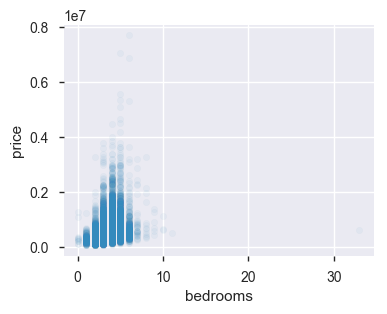

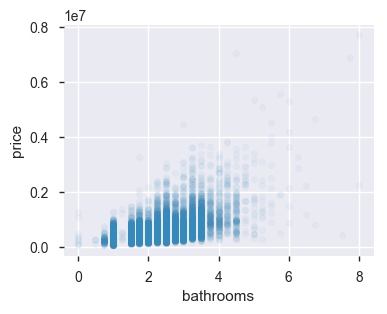

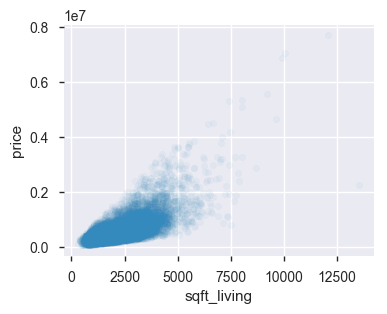

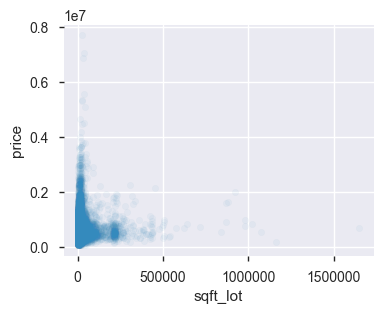

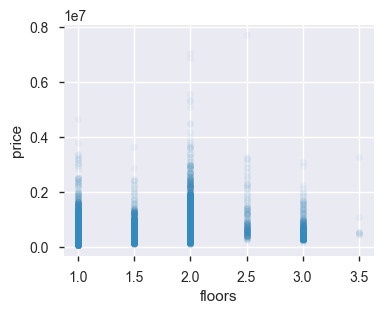

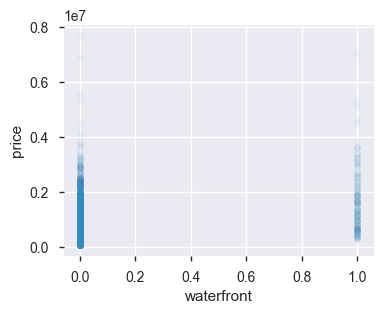

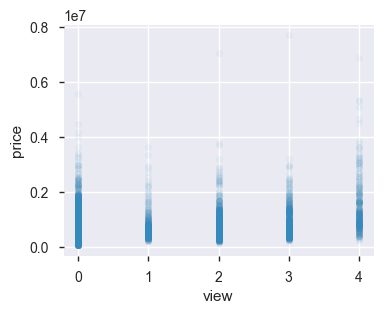

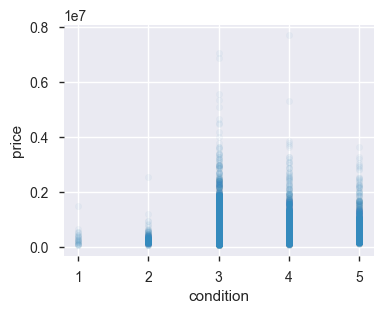

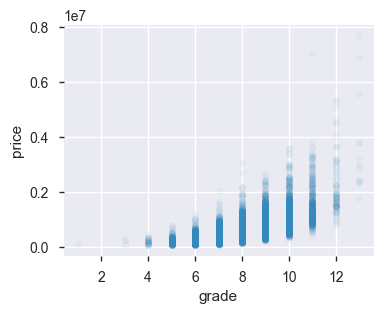

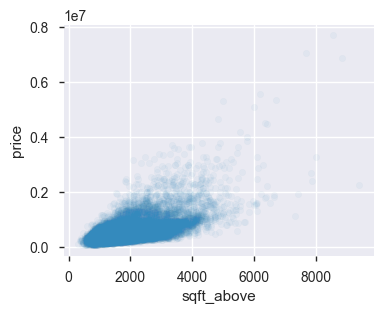

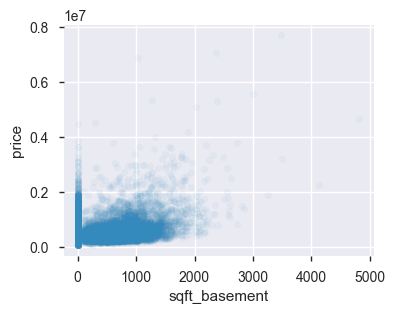

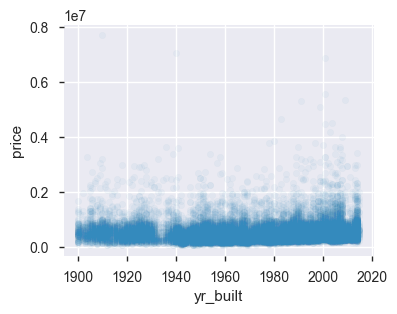

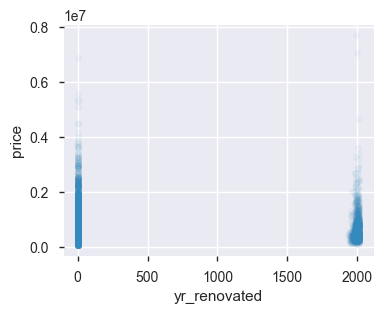

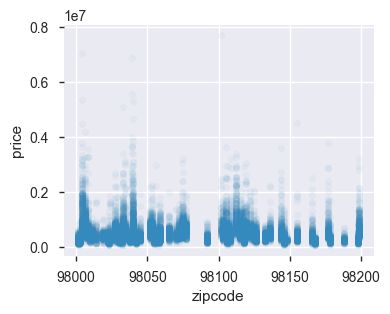

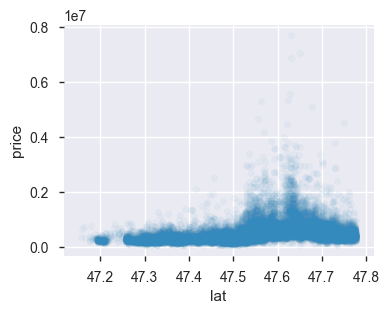

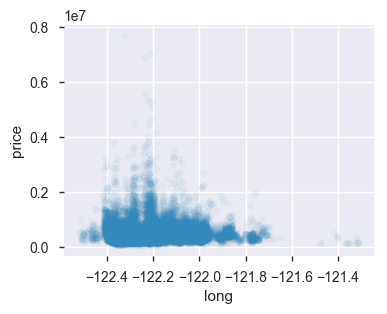

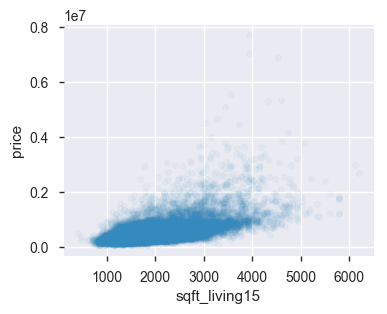

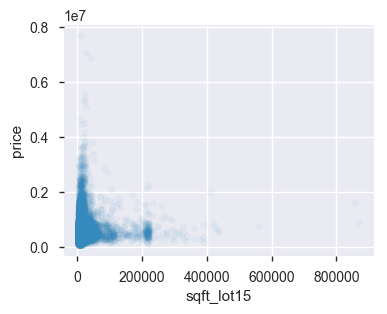

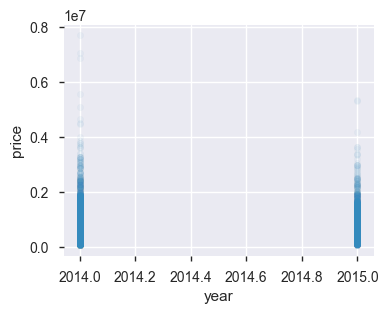

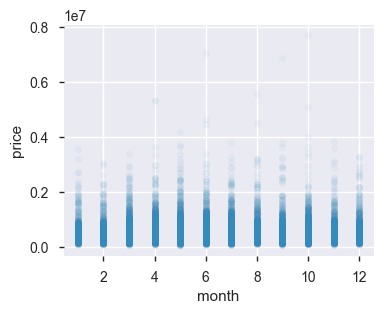

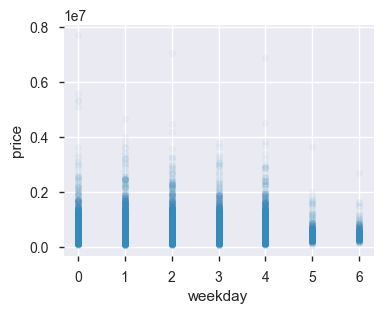

In [20]:
for c in df.columns:
    if c != 'price' :
        df[[c,'price']].plot(kind='scatter',x=c,y='price',alpha=0.05,figsize=(4,3))

######  各散布図からの予測
- bathrooms: 非線形・中央が価格の最大値。最適値は3-5。（使用候補だが非線形を扱える必要あり）
- sqft-living：依存性あり。（使用候補）
- bedrooms：分散を大きいものの、線形と考えることができる。（使用候補）
- sqft-lot：0に殆ど集積している。0以外は弱く増加傾向。（説明機能は低い可能性あり。分離するか、カテゴリカル変数に落とすか。）
- floors：1階と2階に集中。高階の方が高い傾向に見える。（使用候補）
- waterfront：殆ど0。一旦除いて、実施上は別に考える方が良さそう。（削除候補）
- view：増加傾向。依存性は有りそう。（使用候補）
- condition：値段通りの評価も少しあるが、高評価に価格はほとんど影響されていない。（どうしても減らさないといけない時の削除候補）
- grade：依存性あり。ただし0-4は意味を持たない。（使用候補だが非線形を扱える必要あり）
- sqft_above：増加傾向だが、2水準有りそう。（使用候補だが、できればクラス分けしたい）
- sqft_basement：0がカテゴリカル変数的、それ以外は増加傾向。（使用候補、分離が必要）
- yr_renovated:0がカテゴリカル変数、1900以降に数量的変数。（分離する。年データを使用するかしないかが課題）
- zipcode：priceに与えるばらつきが大きく非線形性が高い。（非線形的カテゴリカル変数を線形化する）
- lat:非線形だが依存性あり。（使用候補、非線形を評価できる手法が必要）
- long：範囲外れのlongがあり、longによりpriceの重点変化している。（使用候補、非線形を評価できる手法が必要）
- sqft-living15：sqft-livingと同傾向（どちらかを落とす方が良さそう）
- sqft-lot15：sqft-lotと同傾向（どちらかを落とす方が良さそう）

##### priceは地域を示すlong, lat, zipcodeには依存性はありそうだが規則性はなさそう => いわゆる立地条件

######   

### 5.3 llong, lat, zipcode ３変数間の相関の確認

##### 立地条件に依存性はあるが規則はない（longかlatだけでは一意的に定まらない）ので、
##### 第1段階（線形中心）の説明変数には'zipcode'(郵便番号)を使用する。
##### 以下は、long, lat, zipcode間の関係と、priceのzipcode依存性。

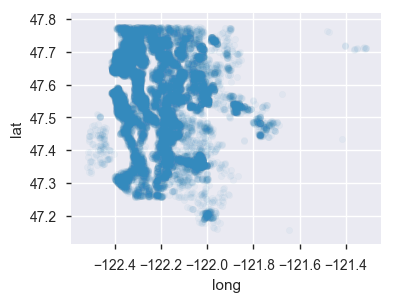

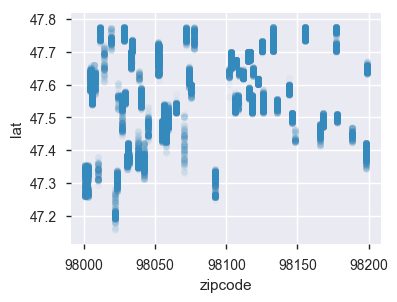

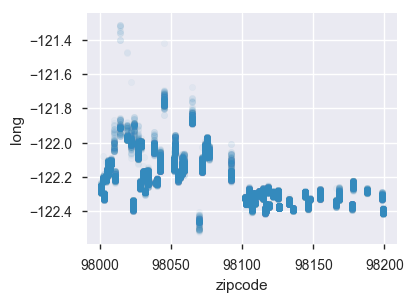

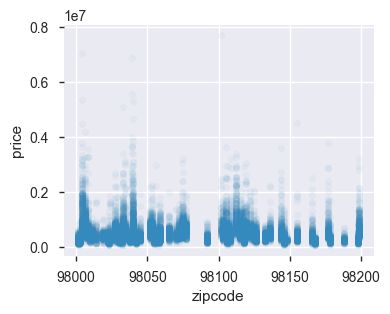

In [21]:
df[['lat','long']].plot(kind='scatter',x='long',y='lat', alpha=0.05,figsize=(4,3))
df[['lat','zipcode']].plot(kind='scatter',x='zipcode',y='lat', alpha=0.05,figsize=(4,3))
df[['long','zipcode']].plot(kind='scatter',x='zipcode',y='long', alpha=0.05,figsize=(4,3))
df[['price','zipcode']].plot(kind='scatter',x='zipcode',y='price', alpha=0.05,figsize=(4,3))

######  

###### 念のため相互の分布関係を確認　（調べましたが描画に時間がかかるので、次の2行はコメントアウトする場合があります）

In [22]:
# pd.plotting.scatter_matrix(df, alpha=0.05, figsize=(20,20))
# plt.show()

#### priceが高くsquare_lotとsquare_lot15が小さい物件が特定のzipcodeもしくは特定のlong-latの組に存在する。（特別立地条件の良い土地がある）⇒　どちらかでこの非線形性をうまく取り扱う必要がある。

#####  

### 5.4 散布図で非線形性が高い（カテゴリカルと量的変数の両方の性格を有する）説明変数の処理

### yr_revavatedの処理

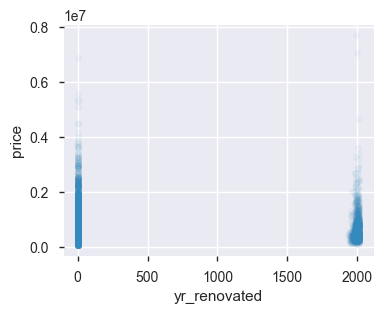

In [23]:
df[['price','yr_renovated']].plot(kind='scatter',x='yr_renovated',y='price', alpha=0.05,figsize=(4,3))

### yr_renovatedの0年のデータが不自然だったので、renovateしたかどうかのデータ（irenovated）を加えておく

In [24]:
df['irenovated'] = np.array(df['yr_renovated'] != 0)*1
df['irenovated'].value_counts().sort_index()

0    20699
1      914
Name: irenovated, dtype: int64

### sqft_basementの処理

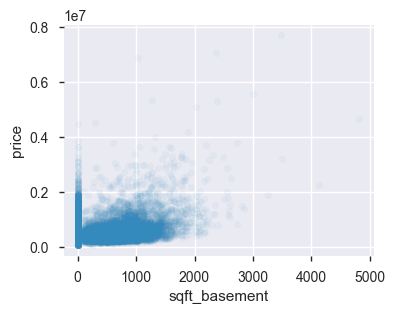

In [25]:
df[['price','sqft_basement']].plot(kind='scatter',x='sqft_basement',y='price', alpha=0.05,figsize=(4,3))

### sqft_basementのsqftのデータが不自然だったので、rbasementの有無のデータ（ibasement）を加えておく

In [26]:
df['ibasement'] = np.array(df['sqft_basement'] != 0)*1
df['ibasement'].value_counts().sort_index()

0    13126
1     8487
Name: ibasement, dtype: int64

#####  

## 6. 「基礎集計」と「目的変数と説明変数」から推測される傾向

- 価格への影響の大きいもの：bedroom（5部屋程度が高い）、square_lotとsquare_lot15（5sqm弱が高い）、floor（2階建てが高い）、condition（3が高い⇒信頼性に問題があるかもしれない）、yr_built（2000年が高い⇒バブルの影響か？）、lat及びlong（人気の立地がある）
- 外れ値が大きい変数：bedroom, square_lot
    - 安いレンジにsquare_lot大：作業場付き住宅？
- 依存性が無さそうなもの：basement
- 依存性が強いもの：zipcode（立地の良い指標となっている可能性が高い）
- 2段階の変化を有するもの：gradeはyr_lastwork1960年以前は下がる。
- 近年square_lotの大きい物件が増加している。
- priceが高くsquare_lotとsquare_lot15が小さい物件は特定のzipcodeにある。（特別立地条件の良い土地がある）
- yr_renovated0年のデータが不自然なので、renovateの有無の説明変数を追加

####  

# 7. 前処理

### 7.1 今回はモデル計算の計算量が多いため立地条件は long と lat で評価。zipcodeは削除
- 今回のスキップ作業（下記コメントアウト）：zipcodeがカテゴリカル変数（名義特徴量）なのでOne Hot Encodingとすること

In [27]:
#df['zipcode_str'] = df['zipcode'].astype(str).map(lambda x:'zip_'+x)
#df = pd.concat([df,pd.get_dummies(df['zipcode_str'])],axis=1)

In [28]:
#df = df.drop(['zipcode','zipcode_str'],axis=1)
df = df.drop(['zipcode'],axis=1)

In [29]:
#display(df.head())

In [30]:
# 各dataの属性の確認（元データのcolumn metadataでstringがfloatになっている）
# zipcodeのone hot vector が多いので必要な時だけ次行で確認します
# print(df.dtypes)

#####  

### 7.2 VIFの計算と該当変数の削除（第1回）

In [31]:
from sklearn.linear_model import LinearRegression
df_vif = df.drop(["price"],axis=1)
for cname in df_vif.columns:  
    y=df_vif[cname]
    X=df_vif.drop(cname, axis=1)
    regr = LinearRegression(fit_intercept=True)
    regr.fit(X, y)
    rsquared = regr.score(X,y)
    #print(cname,":" ,1/(1-np.power(rsquared,2)))
    if rsquared >= 0.9:
        print(cname,X.columns[(regr.coef_> 0.5) | (regr.coef_ < -0.5)])

sqft_living Index(['sqft_above', 'sqft_basement'], dtype='object')
sqft_above Index(['sqft_living', 'sqft_basement'], dtype='object')
sqft_basement Index(['sqft_living', 'sqft_above'], dtype='object')
yr_renovated Index(['waterfront', 'irenovated'], dtype='object')
irenovated Index([], dtype='object')


### sqft_living = sqft_above + sqft_basement らしい。次式で確認。

In [32]:
(df['sqft_living']-df['sqft_above']-df['sqft_basement']).value_counts().sort_index()

0    21613
dtype: int64

### 変数処理
- zipcode間で相補的になっているので一つ取り除く
- sqft-living = sqft_above + sqft_basementになっており、独立ではないのでsqft-livingを取り除く
- latは2次元位置情報として'zipcode'と'long'重複しているので、多重共線性評価値のより高い'lat'を取り除く
- yr_renovatedとyr_builtに多重共線性がみられるので、yr_renovatedを取り除く

In [33]:
#df = df.drop(['sqft_living','zip_98198','lat','yr_renovated'],axis=1)
df = df.drop(['sqft_living','yr_renovated'],axis=1)

In [34]:
# print(df.dtypes)

######  

### 7.3 再度VIFを計算（多重共線性の改善確認、第2回）

In [35]:
#VIFの計算
from sklearn.linear_model import LinearRegression
df_vif = df.drop(["price"],axis=1)
for cname in df_vif.columns:  
    y=df_vif[cname]
    X=df_vif.drop(cname, axis=1)
    regr = LinearRegression(fit_intercept=True)
    regr.fit(X, y)
    rsquared = regr.score(X,y)
    #print(cname,":" ,1/(1-np.power(rsquared,2)))
    if rsquared >= 0.9:
        print(cname,X.columns[(regr.coef_> 0.5) | (regr.coef_ < -0.5)])

##### 出力無し⇒多重共線性無し

## 以上で多重共線性を解消!

######  

## 8. データの標準化（説明変数のばらつき、目標変数への影響を定量化）

### 8.1 標準化の逆算のためのパラメータの算出

In [36]:
df_dscrb_prm=df.describe()
df_stc = df_dscrb_prm.loc['std','price']/1000000

In [37]:
# display(df_dscrb_prm)

### 8.2 各変数の標準化

In [38]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
dfe_array=stdsc.fit_transform(df)
dfe=pd.DataFrame(dfe_array,columns=df.columns,index=df.index)

In [39]:
display(dfe.head(10))

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,lat,long,sqft_living15,sqft_lot15,year,month,weekday,irenovated,ibasement
0,-0.866717,-0.398737,-1.447464,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,...,-0.544898,-0.352572,-0.306079,-0.943355,-0.260715,-0.690655,1.099621,-1.376689,-0.210135,-0.804102
1,-0.005688,-0.398737,0.175607,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,...,-0.681079,1.161568,-0.746341,-0.432686,-0.187868,-0.690655,1.741627,-0.692019,4.758845,1.243624
2,-0.980849,-1.473959,-1.447464,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,...,-1.293892,1.283537,-0.135655,1.070140,-0.172375,1.447901,-1.468403,-0.007349,-0.210135,-0.804102
3,0.174090,0.676485,1.149449,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,...,-0.204446,-0.283288,-1.271816,-0.914174,-0.284522,-0.690655,1.741627,-0.692019,-0.210135,1.243624
4,-0.081958,-0.398737,-0.149007,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,...,0.544548,0.409550,1.199335,-0.272190,-0.192849,1.447901,-1.468403,-0.007349,-0.210135,-0.804102
5,1.865641,0.676485,3.097133,2.096185,-0.915427,-0.087173,-0.305759,-0.629187,2.844170,2.537955,...,1.021181,0.693181,1.483375,4.046611,3.265566,-0.690655,-0.505394,-1.376689,-0.210135,1.243624
6,-0.769746,-0.398737,0.175607,-0.200098,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,-0.088628,...,0.816910,-1.806810,-0.803149,0.366876,-0.217900,-0.690655,-0.184391,1.361990,-0.210135,-0.804102
7,-0.676180,-0.398737,-0.798235,-0.130276,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.879623,...,-0.272536,-1.086547,-0.717937,-0.491048,-0.111980,1.447901,-1.789406,0.677320,-0.210135,-0.804102
8,-0.846016,-0.398737,-1.447464,-0.184381,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.891699,...,-0.374672,-0.344633,-0.874160,-0.301371,-0.170507,1.447901,-0.826397,-0.007349,-0.210135,1.243624
9,-0.591330,-0.398737,0.500221,-0.206351,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.122706,...,1.089271,-1.383168,1.298749,0.588652,-0.190395,1.447901,-1.147400,0.677320,-0.210135,-0.804102


######  

## 9. 特徴量エンジニアリング（不要な説明変数の削除）

### 9.1 変数削除の参照値（削除前の目標変数・説明変数・回帰データ）準備

In [40]:
X = dfe.drop(['price'],axis=1)
y = dfe['price']
regr = LinearRegression(fit_intercept=True)
regr.fit(X, y)
X0=X
y0=y
regr0=regr
regr0_score=regr0.score(X0,y0)

### 9.2  線形回帰を実施し、係数の大きい順番に棒グラフで可視化

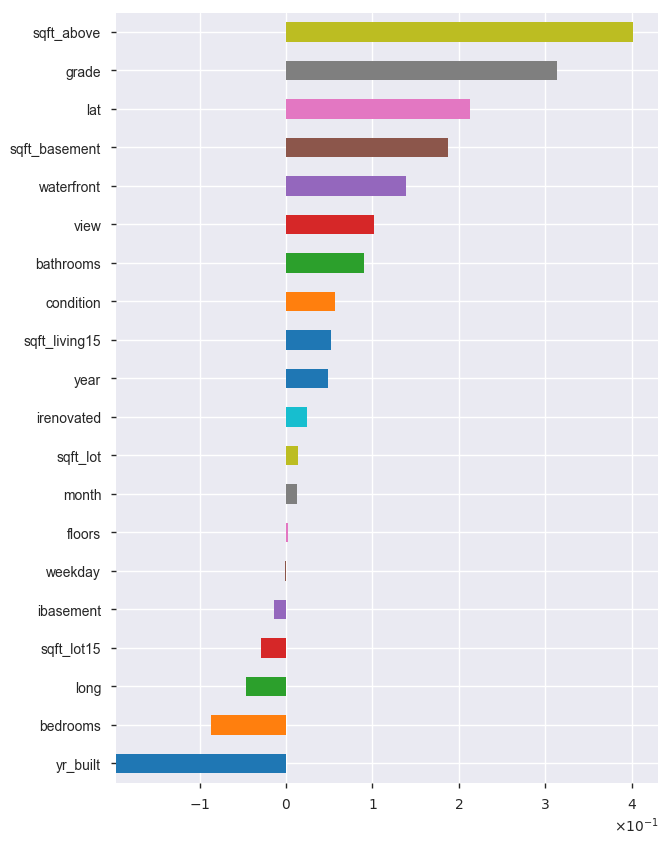

In [41]:
from matplotlib.ticker import ScalarFormatter
ax = pd.Series(regr.coef_,index=X.columns).sort_values()\
  .plot(kind='barh',figsize=(7,10))
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))

In [42]:
# 数値確認済（必要な時は次行で確認）
pd.Series(regr.coef_,index=X.columns).sort_values()

yr_built        -0.196932
bedrooms        -0.087128
long            -0.045698
sqft_lot15      -0.029106
ibasement       -0.013846
weekday         -0.000898
floors           0.001867
month            0.012365
sqft_lot         0.014035
irenovated       0.024235
year             0.048379
sqft_living15    0.051699
condition        0.057038
bathrooms        0.090617
view             0.102123
waterfront       0.138482
sqft_basement    0.187512
lat              0.213183
grade            0.313299
sqft_above       0.401083
dtype: float64

######  

### 9.3 線形回帰係数に見るまとめ

プライオリティは
 >sqft_above(広さの目安) ）> grade（家のquality）> lat(立地条件は大切) 
 
逆に大きなマイナスファクターは、yr_built（新築が立地条件の悪いところに集中している？長年使用できる物件はそれなりにしっかりしたもの？）, long(東の方が山奥で不便？)などが有るかもしれない。

######  

### 9.4 説明変数削除の検討

##### yr_build, floors, bedroomsの係数が負はおかしいかも知れない => 無駄な変数なら削除すれば決定係数が上がるはず

### 説明変数を順番に一通り削除することで改善されるデータがあるか確認する
- 全説明変数データ、及び全説明変数から一変数ずつ取り除いたデータによる、線形回帰のscore（決定係数）を比較する。
- 説明変数を減らして Improvement = 全説明変数によるscore - 削減後データによるscore の正負で判定があるかどうか

In [43]:
# データ確認（長いので必要な時だけ次行を使用、20以上の図は描けないので注意！！）
# for c in df.columns:
#    if c != 'price' :
#        df[[c,'price']].plot(kind='scatter',x=c,y='price',alpha=0.05)

In [44]:
#display (dfe)
for cname in dfe.columns:
        X = dfe.drop([cname,'price'],axis=1)
        y = dfe['price']
        regr = LinearRegression(fit_intercept=True)
        regr.fit(X, y)
        print("Original score: ","{:.10f}".format(regr0_score),\
        "   New score: ","{:.10f}".format(regr.score(X,y)),\
        "   Improvement:","{:.10f}".format(regr.score(X,y)-regr0_score),\
        "   ",cname,)

Original score:  0.6969977890    New score:  0.6969977890    Improvement: 0.0000000000     price
Original score:  0.6969977890    New score:  0.6923934289    Improvement: -0.0046043600     bedrooms
Original score:  0.6969977890    New score:  0.6945856915    Improvement: -0.0024120974     bathrooms
Original score:  0.6969977890    New score:  0.6969041151    Improvement: -0.0000936739     sqft_lot
Original score:  0.6969977890    New score:  0.6969960417    Improvement: -0.0000017473     floors
Original score:  0.6969977890    New score:  0.6810706757    Improvement: -0.0159271133     waterfront
Original score:  0.6969977890    New score:  0.6896847125    Improvement: -0.0073130765     view
Original score:  0.6969977890    New score:  0.6943768484    Improvement: -0.0026209406     condition
Original score:  0.6969977890    New score:  0.6684345119    Improvement: -0.0285632771     grade
Original score:  0.6969977890    New score:  0.6660829330    Improvement: -0.0309148560     sqft_abo

##### 現在の説明変数中に削除をして決定係数（score=0.697）が上昇する（Improvement>0）説明変数はないので、不要な説明変数は無いと判断

######  

## 10. 具体的に異常データを確認

### 10.1 学習（線形回帰）を実施し、データの分布を確認

In [45]:
# 参照・比較するため異常データ操作前の確認
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

###  LinearRegression wiht Cross Validation (Ridge: alpha=>0)

###### LinearRegression のCrossValidation が見つからなかったので、Ridge回帰の alpha=>0 で代替します。

In [46]:
from sklearn import linear_model
from sklearn.linear_model import Ridge
al=[1e-8]
for alv in al:
    cvs = linear_model.Ridge (alpha = alv).fit(X_train, y_train)
    over_fit= cvs.score(X_test, y_test)-cvs.score(X_train, y_train)
    y_pred = cvs.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)*df_stc**2
    mae = mean_absolute_error(y_test, y_pred)*df_stc
    print("Train score:","{:.4f}".format(cvs.score(X_train, y_train),"    "),\
          "Test score :","{:.4f}".format(cvs.score(X_test, y_test),"    "),\
          "Over-fit score:","{:.4f}".format(over_fit),\
          "MSE =%s"%round(mse,4)," "\
          "RMSE=%s"%round(np.sqrt(mse), 4)," " \
          "MAE =%s"%round(mae,4),\
          "alpha=","{:.4f}".format(alv))

Train score: 0.6959 Test score : 0.6988 Over-fit score: 0.0029 MSE =0.0391  RMSE=0.1978  MAE =0.1243 alpha= 0.0000


######  

### 10.2 priceの学習データとテストデータとデータ間の不一致の分布をプロットで確認

C:\Users\pxn10\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


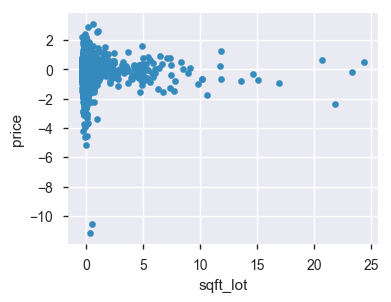

In [47]:
dfp=X_test
dfp['price']=y_pred-y_test
#例示
dfp[['sqft_lot','price']].plot(kind='scatter',x='sqft_lot',y='price',figsize=(4,3))

### 10.3 price<-8に以上データが2つ存在 => price < -7を取り除いてみて、削減を確認。

In [48]:
dfp=X_test
dfp['price']=y_pred-y_test
dfp=dfp[dfp['price'].map(lambda x: x>-7)]

C:\Users\pxn10\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


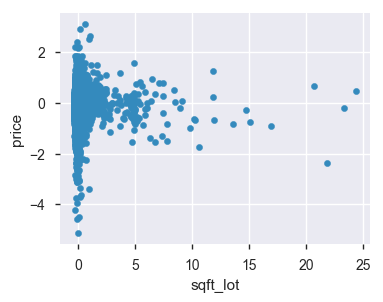

In [49]:
dfp[['sqft_lot','price']].plot(kind='scatter',x='sqft_lot',y='price',figsize=(4,3))

###### 異常データが解消された

### 10.4 異常データ除去後に再度学習チェック
- 異常データ（price<-5：21612個のデータで1個出現する確率0.6％と大変低く特殊なデータ。他のデータ評価が左右されることは好ましくないので）を削除し、その影響確認を実施

In [50]:
dfe=dfe[dfe['price'].map(lambda x: x>-5)]

In [51]:
# 検証対象データ（再掲）
X = dfe.drop(['price'],axis=1)
y = dfe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [52]:
from sklearn import linear_model
from sklearn.linear_model import Ridge
al=[1e-8]
for alv in al:
    cvs = linear_model.Ridge (alpha = alv).fit(X_train, y_train)
    over_fit= cvs.score(X_test, y_test)-cvs.score(X_train, y_train)
    y_pred = cvs.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)*df_stc**2
    mae = mean_absolute_error(y_test, y_pred)*df_stc
    print("Train score:","{:.4f}".format(cvs.score(X_train, y_train),"    "),\
          "Test score :","{:.4f}".format(cvs.score(X_test, y_test),"    "),\
          "Over-fit score:","{:.4f}".format(over_fit),\
          "MSE =%s"%round(mse,4)," "\
          "RMSE=%s"%round(np.sqrt(mse), 4)," " \
          "MAE =%s"%round(mae,4),\
          "alpha=","{:.4f}".format(alv))

Train score: 0.6961 Test score : 0.6983 Over-fit score: 0.0022 MSE =0.0392  RMSE=0.198  MAE =0.1246 alpha= 0.0000


##### 結果は変わっていないので、異常データが統計的に影響しているわけではないことを確認した。

##  

## 11. 各種アルゴリズムによる評価の比較

### 11.1 初期セッティング

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO

In [54]:
test_sizen=0.3
cvn=5
X = dfe.drop(['price'],axis=1)
y = dfe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_sizen, random_state=1234)
ixfe=X.columns
pd.set_option('display.max_colwidth',150)

######  

### 11.2 線形回帰系でのパラメータ設定検討

### Ridge・Lassoの能力を、単純な線形回帰と比較 
- over_fit= cvs.score(X_test, y_test)-cvs.score(X_train, y_train) が最小になるよう、RidgeとLassoのパラメータを求めた。

######  

### 11.2.1  LinearRegression wiht Cross Validation (Ridge: alpha=>0)

###### LinearRegression のCrossValidation が見つからなかったので、Ridge回帰の alpha=>0 で代替します。

In [55]:
from sklearn import linear_model
from sklearn.linear_model import Ridge
al=[1e-8]
for alv in al:
    cvs = linear_model.Ridge (alpha = alv).fit(X_train, y_train)
    over_fit= cvs.score(X_test, y_test)-cvs.score(X_train, y_train)
    y_pred = cvs.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)*df_stc**2
    mae = mean_absolute_error(y_test, y_pred)*df_stc
    print("Train score:","{:.4f}".format(cvs.score(X_train, y_train),"    "),\
          "Test score :","{:.4f}".format(cvs.score(X_test, y_test),"    "),\
          "Over-fit score:","{:.4f}".format(over_fit),\
          "MSE =%s"%round(mse,4)," "\
          "RMSE=%s"%round(np.sqrt(mse), 4)," " \
          "MAE =%s"%round(mae,4),\
          "alpha=","{:.4f}".format(alv))

Train score: 0.6961 Test score : 0.6983 Over-fit score: 0.0022 MSE =0.0392  RMSE=0.198  MAE =0.1246 alpha= 0.0000


###### Train scoreは0.696とzipcodeのOneHotVectorを使用した評価B（2.7.2項）に比べかなり低いが、Test score0.699と同程度で過学習は生じていない。

######  

### 11.2.2 Ridge正則化 （正則化のパラメータ α を 10 ～ 500 で検証）

In [56]:
from sklearn import linear_model
from sklearn.linear_model import Ridge
al=[200,100,70,50,30,20,10,5,1]
for alv in al:
    cvs = linear_model.Ridge (alpha = alv).fit(X_train, y_train)
    over_fit= cvs.score(X_test, y_test)-cvs.score(X_train, y_train)
    y_pred = cvs.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)*df_stc**2
    mae = mean_absolute_error(y_test, y_pred)*df_stc
    print("Train score:","{:.4f}".format(cvs.score(X_train, y_train),"    "),\
          "Test score :","{:.4f}".format(cvs.score(X_test, y_test),"    "),\
          "Over-fit score:","{:.4f}".format(over_fit),\
          "MSE =%s"%round(mse,4),\
          "RMSE=%s"%round(np.sqrt(mse), 4),\
          "MAE =%s"%round(mae,4),\
          "alpha=","{:.3f}".format(alv))

Train score: 0.6960 Test score : 0.6986 Over-fit score: 0.0026 MSE =0.0392 RMSE=0.1979 MAE =0.1239 alpha= 200.000
Train score: 0.6961 Test score : 0.6985 Over-fit score: 0.0024 MSE =0.0392 RMSE=0.1979 MAE =0.1243 alpha= 100.000
Train score: 0.6961 Test score : 0.6984 Over-fit score: 0.0023 MSE =0.0392 RMSE=0.1979 MAE =0.1244 alpha= 70.000
Train score: 0.6961 Test score : 0.6984 Over-fit score: 0.0023 MSE =0.0392 RMSE=0.1979 MAE =0.1244 alpha= 50.000
Train score: 0.6961 Test score : 0.6984 Over-fit score: 0.0023 MSE =0.0392 RMSE=0.1979 MAE =0.1245 alpha= 30.000
Train score: 0.6961 Test score : 0.6984 Over-fit score: 0.0022 MSE =0.0392 RMSE=0.198 MAE =0.1245 alpha= 20.000
Train score: 0.6961 Test score : 0.6983 Over-fit score: 0.0022 MSE =0.0392 RMSE=0.198 MAE =0.1246 alpha= 10.000
Train score: 0.6961 Test score : 0.6983 Over-fit score: 0.0022 MSE =0.0392 RMSE=0.198 MAE =0.1246 alpha= 5.000
Train score: 0.6961 Test score : 0.6983 Over-fit score: 0.0022 MSE =0.0392 RMSE=0.198 MAE =0.1246 

###### alpha=<100で、過学習（Over-fit）とRMSEも安定。以降は、上記の結果との整合性があり、説明変数の多い時（2.7.2項）にも実績のあるalpha=70を含めて評価する。
- Train score: 0.6959 Test score : 0.6989 Over-fit score: 0.0030 MSE =0.0391  RMSE=0.1978  MAE =0.1241 alpha= 70.0000

######  

### 11.2.3 Lasso正則化 （正則化のパラメータ α を 0.00001 ～ 0.2 で検証）

In [57]:
from sklearn import linear_model
from sklearn.linear_model import Lasso
al=[0.1,0.05,0.01,0.007,0.005,0.002,0.001,0.0001,0.00001]
for alv in al:
    cvs = linear_model.Lasso (alpha = alv).fit(X_train, y_train)
    over_fit= cvs.score(X_test, y_test)-cvs.score(X_train, y_train)
    y_pred = cvs.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)*df_stc**2
    mae = mean_absolute_error(y_test, y_pred)*df_stc
    print("Train score:","{:.4f}".format(cvs.score(X_train, y_train),"    "),\
          "Test score :","{:.4f}".format(cvs.score(X_test, y_test),"    "),\
          "Over-fit score:","{:.4f}".format(over_fit),\
          "MSE =%s"%round(mse,4),\
          "RMSE=%s"%round(np.sqrt(mse), 4),\
          "MAE =%s"%round(mae,4),\
          "alpha=","{:.5f}".format(alv))

Train score: 0.6287 Test score : 0.6421 Over-fit score: 0.0134 MSE =0.0465 RMSE=0.2156 MAE =0.1272 alpha= 0.10000
Train score: 0.6713 Test score : 0.6828 Over-fit score: 0.0115 MSE =0.0412 RMSE=0.203 MAE =0.1213 alpha= 0.05000
Train score: 0.6943 Test score : 0.6995 Over-fit score: 0.0052 MSE =0.039 RMSE=0.1976 MAE =0.1224 alpha= 0.01000
Train score: 0.6951 Test score : 0.6995 Over-fit score: 0.0045 MSE =0.039 RMSE=0.1976 MAE =0.1229 alpha= 0.00700
Train score: 0.6954 Test score : 0.6994 Over-fit score: 0.0040 MSE =0.039 RMSE=0.1976 MAE =0.1233 alpha= 0.00500
Train score: 0.6959 Test score : 0.6988 Over-fit score: 0.0029 MSE =0.0391 RMSE=0.1978 MAE =0.124 alpha= 0.00200
Train score: 0.6961 Test score : 0.6986 Over-fit score: 0.0025 MSE =0.0392 RMSE=0.1979 MAE =0.1243 alpha= 0.00100
Train score: 0.6961 Test score : 0.6983 Over-fit score: 0.0022 MSE =0.0392 RMSE=0.198 MAE =0.1246 alpha= 0.00010
Train score: 0.6961 Test score : 0.6983 Over-fit score: 0.0022 MSE =0.0392 RMSE=0.198 MAE =0.1

###### alpha=0.00001で、過学習（Over-fit）とRMSE最小、以降の評価では、alpha=0.00001を含めて評価する。
- Train score: 0.6951 Test score : 0.6995 Over-fit score: 0.0045 MSE =0.039  RMSE=0.1976  MAE =0.1229 alpha= 0.00700

######  

###  11.2.4 LinearRegressionのみ、 Ridge正則化、 Lasso正則化を比較すると、

- Linear: Train score: 0.6959 Test score : 0.6988 Over-fit score: 0.0029 MSE =0.0391  RMSE=0.1978  MAE =0.1243 alpha= 0.0000
- Ridge:  Train score: 0.6959 Test score : 0.6989 Over-fit score: 0.0030 MSE =0.0391  RMSE=0.1978  MAE =0.1241 alpha= 70.0000
- Lasso:  Train score: 0.6951 Test score : 0.6995 Over-fit score: 0.0045 MSE =0.039  RMSE=0.1976  MAE =0.1229 alpha= 0.007000

###### 過学習は見られず精度は、1.Lass（RMSE=0.1976@α=0.007）、2.Ridge（RMSE=0.198, MAE=0.1241@α=0.70）、3.線形回帰のみ（RMSE=0.198, MAE=0.1243）の順番になった。
###### ちなみに、OneHotVectorを使用した場合（評価B）では、過学習の抑制と精度は、1.Ridge（RMSE=0.132@α=70）、2.Lasso（RMSE=0.138@α=0.007）、3.線形回帰のみ（RMSE=0.141）の順番であったので、それに比較すると悪いところで安定していると言える。これについては、線形回帰では立地条件の非線形性を上手く取り込めていないことに起因しているものと考えられる。

######  


## 12. 交差検証（GridSearch + k分割交差検証）の実施
### - 目的： 各モデルの学習能力を精度良く比較する -

### 12.1  計算結果リスト初期化

In [58]:
dfrsl = pd.DataFrame(index=[], columns=["Algorithm","train-score","test-score","over-fit","mse ","rmse","mae "])
dfcnd = pd.DataFrame(index=[], columns=["Algorithm","Parameters"])

######  

### 12.2 LinearRegression （alpha ～　0　のRidge回帰で近似）

###### LinearRegression のCrossValidation が見つからなかったので

In [59]:
from sklearn.linear_model import Ridge
param_gridg = {'alpha':[1e-8]}
cvg = GridSearchCV(Ridge(),param_grid=param_gridg,cv=5)
cf=cvg.fit(X_test,y_test)

In [60]:
cvs = Ridge(alpha=cvg.best_params_['alpha'])
cfb=cvs.fit(X_train,y_train)
over_fit= cvs.score(X_test, y_test)-cvs.score(X_train, y_train)
y_pred = cvg.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred)*df_stc**2
mae = mean_absolute_error(y_test, y_pred)*df_stc
print("Train score:","{:.4f}".format(cvs.score(X_train, y_train),"    "),\
      "Test score :","{:.4f}".format(cvs.score(X_test, y_test),"    "),\
      "Over-fit score:","{:.4f}".format(over_fit),\
      "MSE =%s"%round(mse,4)," "\
      "RMSE=%s"%round(np.sqrt(mse), 4)," " \
      "MAE =%s"%round(mae,4),)
print("")
print("best_params_  ", 0)
print("used parameter_grid",0)

Train score: 0.6961 Test score : 0.6983 Over-fit score: 0.0022 MSE =0.0388  RMSE=0.197  MAE =0.1216

best_params_   0
used parameter_grid 0


In [61]:
# 集計データ保存（結果）
dfrsls = pd.Series(["LinearRegressor",round(cvg.score(X_train, y_train),5),round(cvg.score(X_test, y_test),5),\
                    round(over_fit,5),round(mse,5),round(np.sqrt(mse),5),round(mae,5)], index=dfrsl.columns)
dfrsl = dfrsl.append(dfrsls, ignore_index = True)

In [62]:
# 集計データ保存（条件）
dfcnds = pd.Series(["LinearRegressor",np.str(cvg.best_params_)], index=dfcnd.columns)
dfcnd = dfcnd.append(dfcnds, ignore_index = True)

######  

### 12.3  線形回帰 Ridge正則化

In [63]:
from sklearn.linear_model import Ridge
param_gridg = {'alpha':[100,70,50,40,35,30,25,20,18,17,16,15,12,10]}
cvg = GridSearchCV(Ridge(),param_grid=param_gridg,cv=5)
cf=cvg.fit(X_test,y_test)

In [64]:
cvs = Ridge(alpha=cvg.best_params_['alpha'])
cfb=cvs.fit(X_train,y_train)
over_fit= cvs.score(X_test, y_test)-cvs.score(X_train, y_train)
y_pred = cvg.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred)*df_stc**2
mae = mean_absolute_error(y_test, y_pred)*df_stc
print("Train score:","{:.4f}".format(cvs.score(X_train, y_train),"    "),\
      "Test score :","{:.4f}".format(cvs.score(X_test, y_test),"    "),\
      "Over-fit score:","{:.4f}".format(over_fit),\
      "MSE =%s"%round(mse,4)," "\
      "RMSE=%s"%round(np.sqrt(mse), 4)," " \
      "MAE =%s"%round(mae,4),)
print("")
print("best_params_  ", cvg.best_params_)
print("used parameter_grid",param_gridg)

Train score: 0.6961 Test score : 0.6985 Over-fit score: 0.0024 MSE =0.0388  RMSE=0.1971  MAE =0.1209

best_params_   {'alpha': 100}
used parameter_grid {'alpha': [100, 70, 50, 40, 35, 30, 25, 20, 18, 17, 16, 15, 12, 10]}


In [65]:
# 集計データ保存（結果）
dfrsls = pd.Series(["RidgeRegressor",round(cvg.score(X_train, y_train),5),round(cvg.score(X_test, y_test),5),\
                    round(over_fit,5),round(mse,5),round(np.sqrt(mse),5),round(mae,5)], index=dfrsl.columns)
dfrsl = dfrsl.append(dfrsls, ignore_index = True)

In [66]:
# 集計データ保存（条件）
dfcnds = pd.Series(["RidgeRegressor",np.str(cvg.best_params_)], index=dfcnd.columns)
dfcnd = dfcnd.append(dfcnds, ignore_index = True)

######  

### 12.4  線形回帰 Lasso正則化

In [67]:
from sklearn.linear_model import Lasso
param_gridg = {'alpha':[0.1,0.02,0.01,0.007,0.005,0.03,0.001,0.0001]}
cvg = GridSearchCV(Lasso(),param_grid=param_gridg,cv=5)
cf=cvg.fit(X_test,y_test)

In [68]:
cvs = Lasso(alpha=cvg.best_params_['alpha'])
cfb=cvs.fit(X_train,y_train)
over_fit= cvs.score(X_test, y_test)-cvs.score(X_train, y_train)
y_pred = cvg.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred)*df_stc**2
mae = mean_absolute_error(y_test, y_pred)*df_stc
print("Train score:","{:.4f}".format(cvs.score(X_train, y_train),"    "),\
      "Test score :","{:.4f}".format(cvs.score(X_test, y_test),"    "),\
      "Over-fit score:","{:.4f}".format(over_fit),\
      "MSE =%s"%round(mse,4)," "\
      "RMSE=%s"%round(np.sqrt(mse), 4)," " \
      "MAE =%s"%round(mae,4),)
print("")
print("best_params_  ", cvg.best_params_)
print("used parameter_grid",param_gridg)

Train score: 0.6961 Test score : 0.6983 Over-fit score: 0.0022 MSE =0.0388  RMSE=0.197  MAE =0.1215

best_params_   {'alpha': 0.0001}
used parameter_grid {'alpha': [0.1, 0.02, 0.01, 0.007, 0.005, 0.03, 0.001, 0.0001]}


In [69]:
# 集計データ保存（結果）
dfrsls = pd.Series(["LassoRegressor",round(cvg.score(X_train, y_train),5),round(cvg.score(X_test, y_test),5),\
                    round(over_fit,5),round(mse,5),round(np.sqrt(mse),5),round(mae,5)], index=dfrsl.columns)
dfrsl = dfrsl.append(dfrsls, ignore_index = True)

In [70]:
# 集計データ保存（条件）
dfcnds = pd.Series(["LassoRegressor",np.str(cvg.best_params_)], index=dfcnd.columns)
dfcnd = dfcnd.append(dfcnds, ignore_index = True)

######  

### 12.5 DecisionTreeRegressor （見通しの良い浅い探索）

###### 最大特徴数（max_feature)、最小最終分岐数（min_samples_leaf）、最深度（max_depth）、最小分岐数（min_samples_split）

In [71]:
#display(df)

### 回帰木が書ける範囲で計算

#### 検討時の使用パラメータ：param_gridg = {"max_features":[5,6,7],'min_samples_leaf':[2,3],'max_depth':[4,5,6],"min_samples_split":[2,3,4]}

### 検討後の最適条件

In [72]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
param_gridg = {"max_features":[7],'min_samples_leaf':[3],'max_depth':[6],"min_samples_split":[3]}
cvg = GridSearchCV(DecisionTreeRegressor(),param_grid=param_gridg,cv=cvn)
cf=cvg.fit(X_train,y_train)

In [73]:
cvs = DecisionTreeRegressor(max_features=cvg.best_params_["max_features"],\
                           min_samples_leaf=cvg.best_params_["min_samples_leaf"],\
                           max_depth=cvg.best_params_["max_depth"],\
                           min_samples_split=cvg.best_params_["min_samples_split"])
cfb=cvs.fit(X_train,y_train)
over_fit= cvs.score(X_test, y_test)-cvs.score(X_train, y_train)
y_pred = cvg.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred)*df_stc**2
mae = mean_absolute_error(y_test, y_pred)*df_stc
print("Train score:","{:.4f}".format(cvs.score(X_train, y_train),"    "),\
      "Test score :","{:.4f}".format(cvs.score(X_test, y_test),"    "),\
      "Over-fit score:","{:.4f}".format(over_fit),\
      "MSE =%s"%round(mse,4)," "\
      "RMSE=%s"%round(np.sqrt(mse), 4)," " \
      "MAE =%s"%round(mae,4),)
print("")
print("best_params_  ", cvg.best_params_)
print("used parameter_grid",param_gridg)

Train score: 0.7524 Test score : 0.6779 Over-fit score: -0.0745 MSE =0.0451  RMSE=0.2124  MAE =0.1222

best_params_   {'max_features': 7, 'min_samples_leaf': 3, 'min_samples_split': 3, 'max_depth': 6}
used parameter_grid {'max_features': [7], 'max_depth': [6], 'min_samples_split': [3], 'min_samples_leaf': [3]}


######  精度は低め。

In [74]:
# 集計データ保存（結果）
dfrsls = pd.Series(["DecisionTreeRegressor (shallow)",round(cvg.score(X_train, y_train),5),round(cvg.score(X_test, y_test),5),\
                    round(over_fit,5),round(mse,5),round(np.sqrt(mse),5),round(mae,5)], index=dfrsl.columns)
dfrsl = dfrsl.append(dfrsls, ignore_index = True) 

In [75]:
# 集計データ保存（条件）
dfcnds = pd.Series(["DecisionTreeRegressor (shallow)",np.str(cvg.best_params_)], index=dfcnd.columns)
dfcnd = dfcnd.append(dfcnds, ignore_index = True)

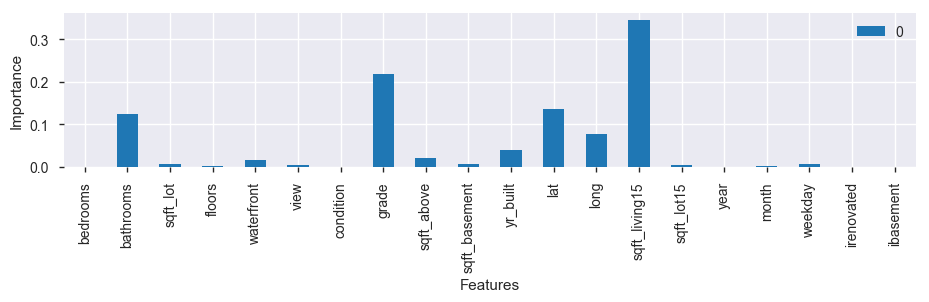

In [76]:
# パラメータ重要性表示
pd.DataFrame(cfb.feature_importances_, index=X_train.columns).plot.bar(figsize=(11,2))
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

###### 深さ限定したので、寄与度の高い グレード、立地条件（long, yr_built）, 居住性（sqft_above, sqft_living15, sqft_above） に評価が集中。

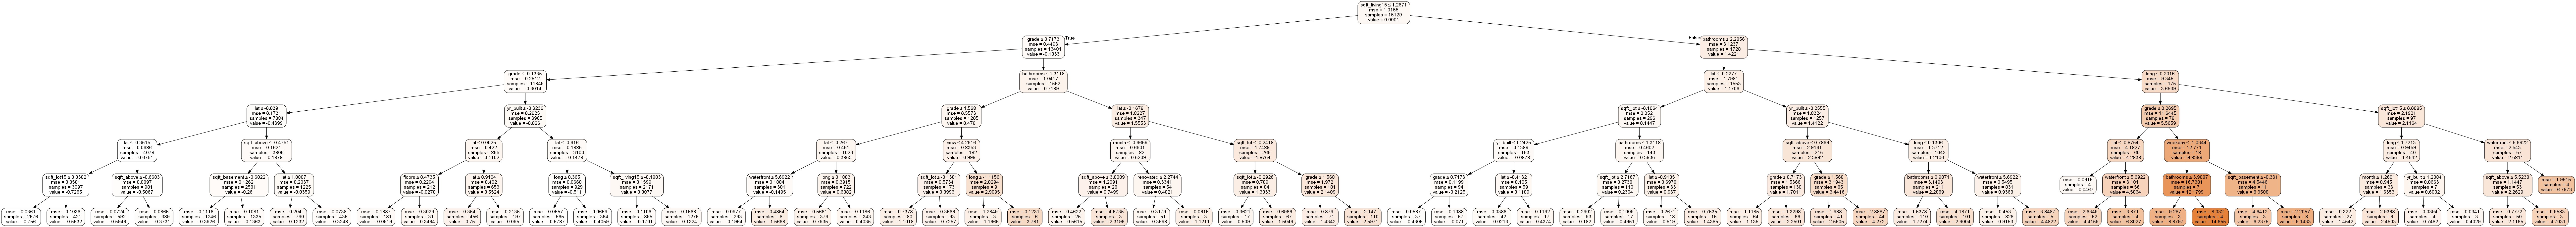

In [77]:
# 決定木の描画
dot_data = StringIO() #dotファイル情報の格納先
export_graphviz(cfb, out_file=dot_data,  
                     feature_names=X.columns,  
                     class_names=X.columns,  
                     filled=True, rounded=True,  
                     special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

######  

### 12.6 DecisionTreeRegressor　（深い -精度の高い- 探索）

###### 最大特徴数（max_feature)、最小最終分岐数（min_samples_leaf）、最深度（max_depth）、最小分岐数（min_samples_split）

####  検討時の使用パラメーター：param_gridg = {"max_features":[6,8,10],'min_samples_leaf':[3,4,5],'max_depth':[10,12,14],"min_samples_split":[2,3,4]}

### 検討後の最適条件

In [78]:
from sklearn.tree import DecisionTreeRegressor
param_gridg = {"max_features":[10],'min_samples_leaf':[5],'max_depth':[14],"min_samples_split":[3]}
cvg = GridSearchCV(DecisionTreeRegressor(),param_grid=param_gridg,cv=cvn)
cfg=cvg.fit(X_train,y_train)
cvs = DecisionTreeRegressor(max_features = cvg.best_params_["max_features"],\
                           min_samples_leaf = cvg.best_params_["min_samples_leaf"],\
                           max_depth =cvg.best_params_["max_depth"],\
                           min_samples_split = cvg.best_params_["min_samples_split"])
cfb=cvs.fit(X_train,y_train)

In [79]:
over_fit= cvs.score(X_test, y_test)-cvs.score(X_train, y_train)
y_pred = cvg.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred)*df_stc**2
mae = mean_absolute_error(y_test, y_pred)*df_stc
print("Train score:","{:.4f}".format(cvs.score(X_train, y_train),"    "),\
      "Test score :","{:.4f}".format(cvs.score(X_test, y_test),"    "),\
      "Over-fit score:","{:.4f}".format(over_fit),\
      "MSE =%s"%round(mse,4)," "\
      "RMSE=%s"%round(np.sqrt(mse), 4)," " \
      "MAE =%s"%round(mae,4),)
print("")
print("best_params_  ", cvg.best_params_)
print("used parameter_grid",param_gridg)

Train score: 0.9042 Test score : 0.6974 Over-fit score: -0.2068 MSE =0.0402  RMSE=0.2004  MAE =0.0976

best_params_   {'max_features': 10, 'min_samples_leaf': 5, 'min_samples_split': 3, 'max_depth': 14}
used parameter_grid {'max_features': [10], 'max_depth': [14], 'min_samples_split': [3], 'min_samples_leaf': [5]}


###### 深さを増して精度は向上したが、まだ過学習気味。

######  

In [80]:
# 集計データ保存（結果）
dfrsls = pd.Series(["DecisionTreeRegressor (deep)",round(cvg.score(X_train, y_train),5),round(cvg.score(X_test, y_test),5),\
                    round(over_fit,5),round(mse,5),round(np.sqrt(mse),5),round(mae,5)], index=dfrsl.columns)
dfrsl = dfrsl.append(dfrsls, ignore_index = True)

In [81]:
# 集計データ保存（条件）
dfcnds = pd.Series(["DecisionTreeRegressor (deep)",np.str(cvg.best_params_)], index=dfcnd.columns)
dfcnd = dfcnd.append(dfcnds, ignore_index = True)

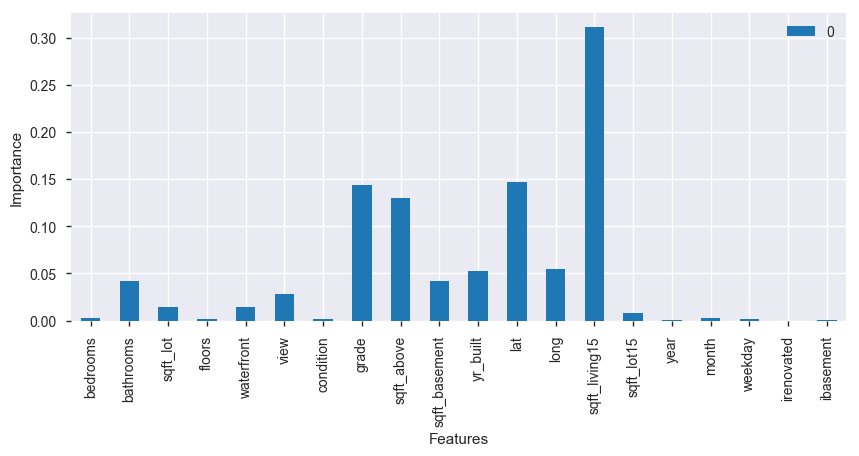

In [82]:
# パラメータ重要性表示
pd.DataFrame(cfb.feature_importances_, index=X_train.columns).plot.bar(figsize=(10,4))
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

###### 住宅価格（price）は、概ね 品質（grade, yr_built)、立地条件（lat, long）、居住性（sqft_living15, sqft_above, bathroom, view）で決まっていると考えることができる結果。

######  

In [83]:
# 決定木の描画
dot_data = StringIO() #dotファイル情報の格納先
export_graphviz(cfb, out_file=dot_data,  
                     feature_names=X.columns,  
                     class_names=X.columns,  
                     filled=True, rounded=True,  
                     special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.256684 to fit



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


######  

### 12.7 RandomForestRegressor

###### 最大認識器数（n_estimators)、最大特徴数（max_feature)、最深度（max_depth）、最小分岐数（min_samples_split）、最小分岐数（min_samples_leaf）

###### データ数を減らしパラメータを大体決めた後、全データを用いて過学習を確認しながら最適化。

####  検討時パラメーター：param_gridg = {'n_estimators':[30,40,50],'max_features':[0.6,0.7,0.8],'max_depth':[15,20,25],'min_samples_split':[2,3,4],'min_samples_leaf':[2,3]}

### 検討後の最適条件

In [84]:
from sklearn.ensemble import RandomForestRegressor
param_gridg = {'n_estimators':[30],'max_features':[0.7],'max_depth':[20],\
               'min_samples_split':[4],'min_samples_leaf':[2]}
cvg = GridSearchCV(RandomForestRegressor(),param_grid=param_gridg,cv=cvn)
cfg=cvg.fit(X_train,y_train)
cvs = RandomForestRegressor(n_estimators=cvg.best_params_['n_estimators'],\
                           max_features=cvg.best_params_['max_features'],\
                           max_depth=cvg.best_params_['max_depth'],\
                           min_samples_split=cvg.best_params_['min_samples_split'],\
                           min_samples_leaf=cvg.best_params_['min_samples_leaf'])
cfb=cvs.fit(X_train,y_train)

In [85]:
over_fit= cvs.score(X_test, y_test)-cvs.score(X_train, y_train)
y_pred = cvg.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred)*df_stc**2
mae = mean_absolute_error(y_test, y_pred)*df_stc
print("Train score:","{:.4f}".format(cvs.score(X_train, y_train),"    "),\
      "Test score :","{:.4f}".format(cvs.score(X_test, y_test),"    "),\
      "Over-fit score:","{:.4f}".format(over_fit),\
      "MSE =%s"%round(mse,4)," "\
      "RMSE=%s"%round(np.sqrt(mse), 4)," " \
      "MAE =%s"%round(mae,4),)
print("")
print("best_params_  ", cvg.best_params_)
print("used parameter_grid",param_gridg)

Train score: 0.9704 Test score : 0.8499 Over-fit score: -0.1204 MSE =0.0184  RMSE=0.1358  MAE =0.0712

best_params_   {'max_features': 0.7, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 30, 'max_depth': 20}
used parameter_grid {'min_samples_leaf': [2], 'max_features': [0.7], 'n_estimators': [30], 'min_samples_split': [4], 'max_depth': [20]}


####  精度が大幅に改善、過学習もある程度抑制。

In [86]:
# 集計データ保存（結果）
dfrsls = pd.Series(["RandomForestRegressor",round(cvg.score(X_train, y_train),5),round(cvg.score(X_test, y_test),5),\
                    round(over_fit,5),round(mse,5),round(np.sqrt(mse),5),round(mae,5)], index=dfrsl.columns)
dfrsl = dfrsl.append(dfrsls, ignore_index = True) 

In [87]:
# 集計データ保存（条件）
dfcnds = pd.Series(["RandomForestRegressor",np.str(cvg.best_params_)], index=dfcnd.columns)
dfcnd = dfcnd.append(dfcnds, ignore_index = True)

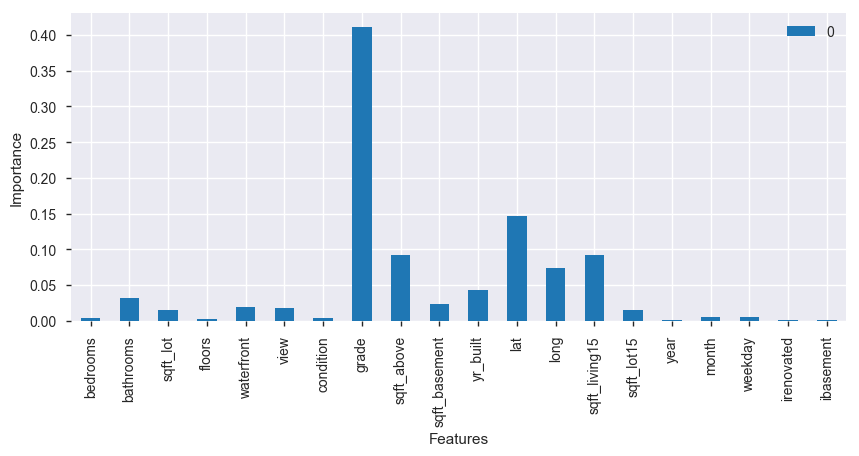

In [88]:
# パラメータ重要性表示
pd.DataFrame(cfb.feature_importances_, index=X_train.columns).plot.bar(figsize=(10,4))
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

###### DecisionTree回帰に比較して、バランスが取れている感じ。
###### 住宅価格（price）は、概ね 品質（grade,yr_built)、立地条件（lat, long）、居住性（sqft_living15, sqft_above）で決まっていると考えることができる結果。風呂の数（bathrooms）が効いているのは、例えば「物件数としては少なくても、お客様を招待できるレベル物件の評価が高い」と言うことかも知れない。WaterfrontやViewも追加的なプラスポイントであろう。

##### 最適決定木表示：パラメーター選択初期に下記 graphviz（決定木描画）を使用
- 深い探索の場合は、メモリーを食うので、他のグラフ出力はしないでおく必要がある。（他のグラフを優先したいので、Markdownに落としている）

for i, enu in enumerate(cfb.estimators_):
    dot_data = StringIO() #dotファイル情報の格納先
    export_graphviz(enu, out_file=dot_data, feature_names=X.columns,class_names=X.columns,\
                         filled=True, rounded=True,special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

######  

### 12.8 AdaBoostRegressor

###### 最大認識器数（n_estimators)、学習率（learning_rate）、random発生指定（random_state）、更新時重み（loss）

#### 検討時のパラメーター：param_gridg = {'n_estimators':[40,60,80],'learning_rate':[0.15,0.2,0.3],'random_state':[8,10,12],'loss':["linear", "square","exponential"]}

### 検討後の最適条件

In [89]:
from sklearn.ensemble import AdaBoostRegressor
param_gridg = {'n_estimators':[40],'learning_rate':[0.15],\
               'random_state':[10],'loss':["exponential"]}
cvg = GridSearchCV(AdaBoostRegressor(),param_grid=param_gridg,cv=cvn)
cfg=cvg.fit(X_train,y_train)
cvs = AdaBoostRegressor(n_estimators=cvg.best_params_['n_estimators'],\
                           learning_rate=cvg.best_params_['learning_rate'],\
                           random_state=cvg.best_params_['random_state'],\
                           loss=cvg.best_params_['loss'])
cfb=cvs.fit(X_train,y_train)

In [90]:
over_fit= cvs.score(X_test, y_test)-cvs.score(X_train, y_train)
y_pred = cvg.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred)*df_stc**2
mae = mean_absolute_error(y_test, y_pred)*df_stc
print("Train score:","{:.4f}".format(cvs.score(X_train, y_train),"    "),\
      "Test score :","{:.4f}".format(cvs.score(X_test, y_test),"    "),\
      "Over-fit score:","{:.4f}".format(over_fit),\
      "MSE =%s"%round(mse,4)," "\
      "RMSE=%s"%round(np.sqrt(mse), 4)," " \
      "MAE =%s"%round(mae,4),)
print("")
print("best_params_  ", cvg.best_params_)
print("used parameter_grid",param_gridg)

Train score: 0.6945 Test score : 0.6574 Over-fit score: -0.0371 MSE =0.0445  RMSE=0.211  MAE =0.1368

best_params_   {'learning_rate': 0.15, 'n_estimators': 40, 'loss': 'exponential', 'random_state': 10}
used parameter_grid {'learning_rate': [0.15], 'n_estimators': [40], 'loss': ['exponential'], 'random_state': [10]}


###### RandomForest回帰よりかなり悪い（DecisionTree回帰と比べても若干悪い）が、過学習は殆どない。

######  

In [91]:
# 集計データ保存（結果）
dfrsls = pd.Series(["AdaBoostRegressor",round(cvg.score(X_train, y_train),5),round(cvg.score(X_test, y_test),5),\
                    round(over_fit,5),round(mse,5),round(np.sqrt(mse),5),round(mae,5)], index=dfrsl.columns)
dfrsl = dfrsl.append(dfrsls, ignore_index = True) 

In [92]:
# 集計データ保存（条件）
dfcnds = pd.Series(["AdaBoostRegressor",np.str(cvg.best_params_)], index=dfcnd.columns)
dfcnd = dfcnd.append(dfcnds, ignore_index = True)

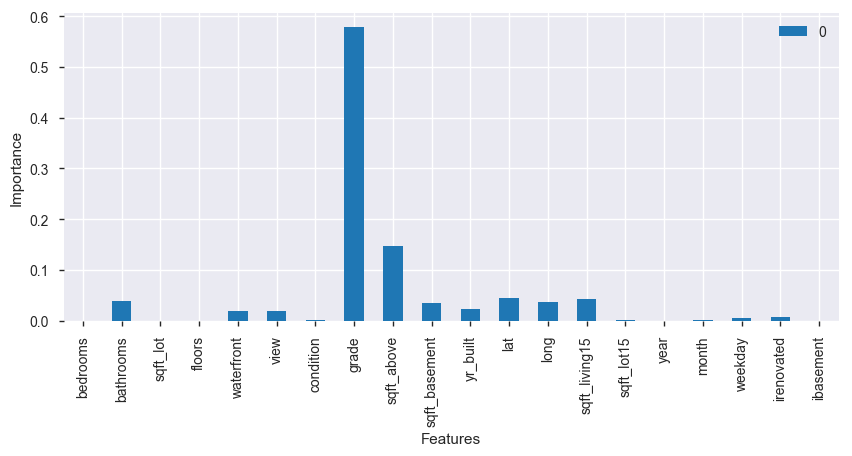

In [93]:
# パラメータ重要性表示
pd.DataFrame(cfb.feature_importances_, index=X_train.columns).plot.bar(figsize=(10,4))
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

###### 低depthのDecisionTreeのバランスの悪い感じに似ている。精度も悪いのでこの結果は信頼できない。

##### 最適決定木表示

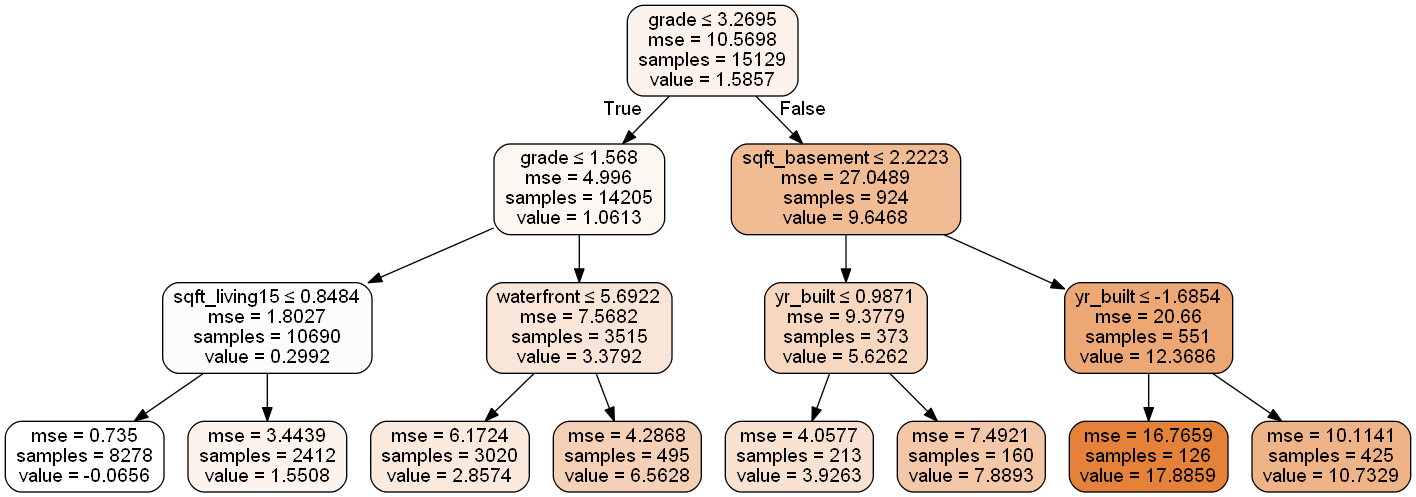

In [94]:
for i, enu in enumerate(cfb.estimators_):
    dot_data = StringIO() #dotファイル情報の格納先
    export_graphviz(enu, out_file=dot_data, feature_names=X.columns,class_names=X.columns,\
                         filled=True, rounded=True,special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

######  

### 12.9 BaggingRegressor

###### 行方向学習データ使用率（max_features)、アンサンブルに使用する認識器数（n_estimators）、最深度（max_depth）、

####  検討時のパラメーター：param_gridg = {'max_features':[0.8,0.9,0.95],'n_estimators':[100,120,140],'max_samples':[0.8,0.85,0.9]}

### 検討後の最適条件

In [95]:
from sklearn.ensemble import BaggingRegressor
param_gridg = {'max_features':[0.9],'n_estimators':[100],'max_samples':[0.85]}
cvg = GridSearchCV(BaggingRegressor(),param_grid=param_gridg,cv=cvn)
cfg=cvg.fit(X_train,y_train)
cvs = BaggingRegressor(max_features=cvg.best_params_['max_features'],\
                           n_estimators=cvg.best_params_['n_estimators'],\
                           max_samples=cvg.best_params_['max_samples'])
cfb=cvs.fit(X_train,y_train)

In [96]:
over_fit= cvs.score(X_test, y_test)-cvs.score(X_train, y_train)
y_pred = cvg.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred)*df_stc**2
mae = mean_absolute_error(y_test, y_pred)*df_stc
print("Train score:","{:.4f}".format(cvs.score(X_train, y_train),"    "),\
      "Test score :","{:.4f}".format(cvs.score(X_test, y_test),"    "),\
      "Over-fit score:","{:.4f}".format(over_fit),\
      "MSE =%s"%round(mse,4)," "\
      "RMSE=%s"%round(np.sqrt(mse), 4)," " \
      "MAE =%s"%round(mae,4),)
print("")
print("best_params_  ", cvg.best_params_)
print("used parameter_grid",param_gridg)

Train score: 0.9762 Test score : 0.8629 Over-fit score: -0.1133 MSE =0.0174  RMSE=0.132  MAE =0.0698

best_params_   {'max_samples': 0.85, 'max_features': 0.9, 'n_estimators': 100}
used parameter_grid {'max_samples': [0.85], 'max_features': [0.9], 'n_estimators': [100]}


#### 精度は良好。RandomForest回帰よりも精度は同程度、多少過学習気味。

######  

In [97]:
# 集計データ保存（結果）
dfrsls = pd.Series(["BaggingRegressor",round(cvg.score(X_train, y_train),5),round(cvg.score(X_test, y_test),5),\
                    round(over_fit,5),round(mse,5),round(np.sqrt(mse),5),round(mae,5)], index=dfrsl.columns)
dfrsl = dfrsl.append(dfrsls, ignore_index = True) 

In [98]:
# 集計データ保存（条件）
dfcnds = pd.Series(["BaggingRegressor",np.str(cvg.best_params_)], index=dfcnd.columns)
dfcnd = dfcnd.append(dfcnds, ignore_index = True)

######  パラメータ重要性表示できず => 'BaggingRegressor' object has no attribute 'feature_importances_'

######  

### 12.10 KNeighborsRegressor

###### 隣接距離重み（weights)、使用アルゴリズム（algorithm）、ball_treeとkd_treeの場合（leaf_size）

#### 検討時のパラメーター：param_gridg = {'n_neighbors':[3,4,5,],'leaf_size':[3,4,6],'algorithm':['auto','ball_tree','kd_tree','brute'],'weights':['uniform','distance']}

### 検討後の最適条件

In [99]:
from sklearn.neighbors import KNeighborsRegressor
param_gridg = {'n_neighbors':[5],'leaf_size':[3],\
               'algorithm':['auto'],'weights':['distance']}
cvg = GridSearchCV(KNeighborsRegressor(),param_grid=param_gridg,cv=cvn)
cfg=cvg.fit(X_train,y_train)
cvs = KNeighborsRegressor(n_neighbors=cvg.best_params_['n_neighbors'],\
                           leaf_size=cvg.best_params_['leaf_size'],\
                           algorithm=cvg.best_params_['algorithm'],\
                           weights=cvg.best_params_['weights'])
cfb=cvs.fit(X_train,y_train)

In [100]:
over_fit= cvs.score(X_test, y_test)-cvs.score(X_train, y_train)
y_pred = cvg.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred)*df_stc**2
mae = mean_absolute_error(y_test, y_pred)*df_stc
print("Train score:","{:.4f}".format(cvs.score(X_train, y_train),"    "),\
      "Test score :","{:.4f}".format(cvs.score(X_test, y_test),"    "),\
      "Over-fit score:","{:.4f}".format(over_fit),\
      "MSE =%s"%round(mse,4)," "\
      "RMSE=%s"%round(np.sqrt(mse), 4)," " \
      "MAE =%s"%round(mae,4),)
print("")
print("best_params_  ", cvg.best_params_)
print("used parameter_grid",param_gridg)

Train score: 1.0000 Test score : 0.7429 Over-fit score: -0.2571 MSE =0.0334  RMSE=0.1828  MAE =0.0991

best_params_   {'algorithm': 'auto', 'weights': 'distance', 'leaf_size': 3, 'n_neighbors': 5}
used parameter_grid {'algorithm': ['auto'], 'weights': ['distance'], 'leaf_size': [3], 'n_neighbors': [5]}


###### 過学習が顕著、信頼性は低そう。精度のレベルは、zipcodeのOneHotoVectorを使った場合（2.7.3項の評価B）と同程度

In [101]:
# 集計データ保存（結果）
dfrsls = pd.Series(["KNeighborsRegressor",round(cvg.score(X_train, y_train),5),round(cvg.score(X_test, y_test),5),\
                    round(over_fit,5),round(mse,5),round(np.sqrt(mse),5),round(mae,5)], index=dfrsl.columns)
dfrsl = dfrsl.append(dfrsls, ignore_index = True) 

In [102]:
# 集計データ保存（条件）
dfcnds = pd.Series(["KNeighborsRegressor",np.str(cvg.best_params_)], index=dfcnd.columns)
dfcnd = dfcnd.append(dfcnds, ignore_index = True)

######  

### 12.11 Support Vector Regression (sklearn.svm.SVR)

###### ペナルティ（C)、ペナルティ無し範囲（epsilon）、kernelアルゴリズム（kernel）
###### 多項式kernel次数（degree）、 rbf, poly,sigmoidのkernel係数（gamma）、最大反復回数（max_iter）

####  検討時のパラメーター：param_gridg = {'C':[5.0,6.0,7.0],'epsilon':[0.15,0.17,0.20],'kernel':['rbf','linear','poly','sigmoid'],'degree':[1,2],'gamma':['auto'],'max_iter':[-1]}

###  検討後の最適条件

In [103]:
from sklearn.svm import SVR
param_gridg = {'C':[7.0],'epsilon':[0.17],'kernel':['rbf'],\
               'degree':[1],'gamma':['auto'],'max_iter':[-1]}
cvg = GridSearchCV(SVR(),param_grid=param_gridg,cv=cvn)
cf=cvg.fit(X_train,y_train)
cvs = SVR(C=cvg.best_params_['C'],\
                           epsilon=cvg.best_params_['epsilon'],\
                           kernel=cvg.best_params_['kernel'],\
                           degree=cvg.best_params_['degree'],\
                           gamma=cvg.best_params_['gamma'],\
                           max_iter=cvg.best_params_['max_iter'])
cfb=cvs.fit(X_train,y_train)

In [104]:
over_fit= cvs.score(X_test, y_test)-cvs.score(X_train, y_train)
y_pred = cvg.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred)*df_stc**2
mae = mean_absolute_error(y_test, y_pred)*df_stc
print("Train score:","{:.4f}".format(cvs.score(X_train, y_train),"    "),\
      "Test score :","{:.4f}".format(cvs.score(X_test, y_test),"    "),\
      "Over-fit score:","{:.4f}".format(over_fit),\
      "MSE =%s"%round(mse,4)," "\
      "RMSE=%s"%round(np.sqrt(mse), 4)," " \
      "MAE =%s"%round(mae,4),)
print("")
print("best_params_  ", cvg.best_params_)
print("used parameter_grid",param_gridg)

Train score: 0.9231 Test score : 0.7734 Over-fit score: -0.1497 MSE =0.0294  RMSE=0.1716  MAE =0.0866

best_params_   {'max_iter': -1, 'gamma': 'auto', 'kernel': 'rbf', 'degree': 1, 'epsilon': 0.17, 'C': 7.0}
used parameter_grid {'max_iter': [-1], 'gamma': ['auto'], 'kernel': ['rbf'], 'degree': [1], 'epsilon': [0.17], 'C': [7.0]}


######  過学習の傾向、精度は、zipcodeのOneHotVectorを使った場合（2.7.3項 評価B）に比較して悪い。

In [105]:
# 集計データ保存（結果）
dfrsls = pd.Series(["SVR",round(cvg.score(X_train, y_train),5),round(cvg.score(X_test, y_test),5),\
                    round(over_fit,5),round(mse,5),round(np.sqrt(mse),5),round(mae,5)], index=dfrsl.columns)
dfrsl = dfrsl.append(dfrsls, ignore_index = True) 

In [106]:
# 集計データ保存（条件）
dfcnds = pd.Series(["SVR",np.str(cvg.best_params_)], index=dfcnd.columns)
dfcnd = dfcnd.append(dfcnds, ignore_index = True)

######  

### 12.12 Neural Network

####  検討時のパラメーター：optimizer = ['adam', SDG], learning ratio = 0.001~0.05, 3~5 Layers, epoch = 80~140, batch = 30~120,  

###  検討後の最適条件
##### parameters : optimizer = adam, learning ratio = 0.01, 3-Layers(20Relu-10Relu-1Lin), epoch = 120, batch = 50 

In [107]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
#from keras.optimizers import SGD,RMSprop, Adagrad, Adadelta, Adam
from keras import optimizers
from keras.layers import Activation, Dense
from sklearn.metrics import r2_score
display(X_train.shape)

C:\Users\pxn10\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(15129, 20)

####  学習方法選択

In [108]:
adam=optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
sgd=optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
parameters = 'optimizer = adam, learning ratio = 0.01, 3-layers(20Relu-10Relu-1Lin), epoch = 120, batch = 50  '

#### モデル設計

In [109]:
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=20))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

#### モデル構築

In [110]:
model.compile(loss='mse', optimizer='adam')

####  学習

In [111]:
fithist = model.fit(X_train, y_train,epochs=120,batch_size=50,validation_data=(X_test, y_test))

Train on 15129 samples, validate on 6484 samples
Epoch 1/120
15129/15129 [==============================] - 0s 26us/step - loss: 0.4742 - val_loss: 0.3094
Epoch 2/120
15129/15129 [==============================] - 0s 14us/step - loss: 0.2846 - val_loss: 0.2608
Epoch 3/120
15129/15129 [==============================] - 0s 14us/step - loss: 0.2466 - val_loss: 0.2441
Epoch 4/120
15129/15129 [==============================] - 0s 15us/step - loss: 0.2268 - val_loss: 0.2397
Epoch 5/120
15129/15129 [==============================] - 0s 14us/step - loss: 0.2141 - val_loss: 0.2192
Epoch 6/120
15129/15129 [==============================] - 0s 14us/step - loss: 0.2014 - val_loss: 0.2083
Epoch 7/120
15129/15129 [==============================] - 0s 14us/step - loss: 0.1936 - val_loss: 0.2031
Epoch 8/120
15129/15129 [==============================] - 0s 14us/step - loss: 0.1835 - val_loss: 0.2032
Epoch 9/120
15129/15129 [==============================] - 0s 15us/step - loss: 0.1763 - val_loss: 0.19

####  結果処理

In [112]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)
r2_train= r2_score(y_train_pred,y_train)
r2_test= r2_score(y_test_pred,y_test)
over_fit=r2_test-r2_train      
#y_pred = model.evaluate(X_train, y_train)
mse = mean_squared_error(y_test, y_test_pred)*df_stc**2
mae = mean_absolute_error(y_test, y_test_pred)*df_stc

####  結果出力

In [113]:
print("Train score:","{:.4f}".format(r2_train,"    "),\
      "Test score :","{:.4f}".format(r2_test,"    "),\
      "Over-fit score:","{:.4f}".format(over_fit),\
      "MSE =%s"%round(mse,4)," "\
      "RMSE=%s"%round(np.sqrt(mse), 4)," " \
      "MAE =%s"%round(mae,4),)

Train score: 0.9285 Test score : 0.8700 Over-fit score: -0.0585 MSE =0.0165  RMSE=0.1284  MAE =0.0735


######  過学習の傾向、精度は、zipcodeのOneHotVectorを使った場合（2.7.3項 評価B）に比較して悪い。

In [114]:
# 集計データ保存（結果）
dfrsls = pd.Series(["NN",round(r2_train,5),round(r2_test,5),round(over_fit,5),\
                    round(mse,5),round(np.sqrt(mse),5),round(mae,5)], index=dfrsl.columns)
dfrsl = dfrsl.append(dfrsls, ignore_index = True) 

In [115]:
# 集計データ保存（条件）
dfcnds = pd.Series(["NN",parameters], index=dfcnd.columns)
dfcnd = dfcnd.append(dfcnds, ignore_index = True)

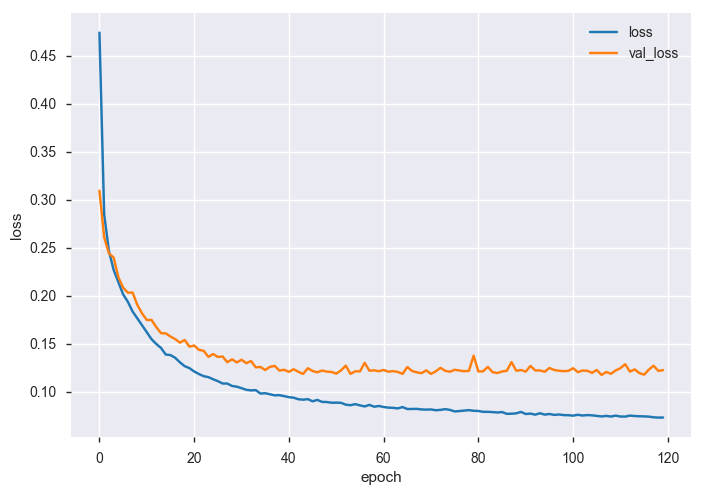

In [116]:
#print(y_test)
# 各epochにおける損失と精度をdfに入れる
dfnn = pd.DataFrame(fithist.history)
# グラフ化
dfnn[["loss", "val_loss"]].plot()
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

######  

######   

###  12.13　交差検証の精度データのまとめ

In [117]:
display(dfrsl)
display(dfcnd)

,Algorithm,train-score,test-score,over-fit,mse,rmse,mae
0,LinearRegressor,0.69353,0.70115,0.00221,0.03882,0.19703,0.12157
1,RidgeRegressor,0.69306,0.70095,0.00240,0.03885,0.19710,0.12089
2,LassoRegressor,0.69352,0.70115,0.00224,0.03882,0.19703,0.12155
3,DecisionTreeRegressor (shallow),0.73013,0.65262,-0.07447,0.04513,0.21243,0.12217
4,DecisionTreeRegressor (deep),0.89156,0.69071,-0.20678,0.04018,0.20044,0.09758
5,RandomForestRegressor,0.96935,0.85800,-0.12044,0.01845,0.13582,0.07120
6,AdaBoostRegressor,0.69454,0.65744,-0.03711,0.04450,0.21095,0.13683
7,BaggingRegressor,0.97609,0.86577,-0.11329,0.01744,0.13205,0.06976
8,KNeighborsRegressor,1.00000,0.74289,-0.25711,0.03340,0.18276,0.09913
9,SVR,0.92310,0.77343,-0.14967,0.02943,0.17156,0.08664


,Algorithm,Parameters
0,LinearRegressor,{'alpha': 1e-08}
1,RidgeRegressor,{'alpha': 100}
2,LassoRegressor,{'alpha': 0.0001}
3,DecisionTreeRegressor (shallow),"{'max_features': 7, 'min_samples_leaf': 3, 'min_samples_split': 3, 'max_depth': 6}"
4,DecisionTreeRegressor (deep),"{'max_features': 10, 'min_samples_leaf': 5, 'min_samples_split': 3, 'max_depth': 14}"
5,RandomForestRegressor,"{'max_features': 0.7, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 30, 'max_depth': 20}"
6,AdaBoostRegressor,"{'learning_rate': 0.15, 'n_estimators': 40, 'loss': 'exponential', 'random_state': 10}"
7,BaggingRegressor,"{'max_samples': 0.85, 'max_features': 0.9, 'n_estimators': 100}"
8,KNeighborsRegressor,"{'algorithm': 'auto', 'weights': 'distance', 'leaf_size': 3, 'n_neighbors': 5}"
9,SVR,"{'max_iter': -1, 'gamma': 'auto', 'kernel': 'rbf', 'degree': 1, 'epsilon': 0.17, 'C': 7.0}"


######  

######  

# 13 前回までの学習の記録

## 13.1 DAY1の復習
### 課題
    1. Kaggleアカウントを取得し、該当課題のデータをダウンロード。　　　　　　　　=> 実施（DAY1）
    1. 目的変数と説明変数の関係を確認するためのグラフを作成。　　　　　　　　　　=> 実施（DAY1)
        -現状：相関を散布図で確認（latとlogをZipcodeで代替）
    1. 目的変数を説明するのに有効そうな説明変数を見つける。　　　　　　　　　　　=> 実施（DAY2）
        -現状：date,sqft-living,yr_renovated,lat,long以外を使用 （VIF評価）
    1. 欠測値と異常値を確認し、適切に処理する（前処理)。　　　　　　　　　　　　 => 実施（DAY2）
        -現状：isnull().sum()でチェック。Z得点<-5のデータを異常として削除
    1. DAY1で学んだアルゴリズムを利用する。                                      => 実施（DAY1)
        -線形回帰を使用（Lasso, RidgeはDAY2の復習で実施）
    1. 回帰の場合は線形回帰、分類の場合はロジスティック回帰　　　　　　　　　　　=> 実施（DAY1)
    1. 質的変数が扱えないアルゴリズムを使う場合は、ダミー変数に置き換える。　　　=> 実施（DAY2）
        - zipcodeをone hot vector化
    1. 予測精度または識別精度は、交差検証によって確認する。　　　　　　　　　　　=> 実施（DAY2）
        - Day1: 線形回帰で学習のみ実施。決定係数= 0.70（学習の字実施）。
        - 現状：線形・Lasso・Ridgeで、学習・検証、交差検証を確認
          　　　精度は決定係数= 0.808, RMSE=15.6万ドル
    1. 回帰問題の場合は、MSE、RMSE、MAEを求める。　　　　　　　　　　　　　　　　=> 実施（DAY2）
        - MSE= 0.024, RMSE=0.156, MAE =0.096　（単位100Mドル）
    1. 分類問題の場合は、混同行列を作成し、Accuracy, Recall, Precisionを求める。 -  対象外
    1. できたところまでをnotebookでまとめ、KernelsまたはGithubで公開する。　　　 => 実施（DAY2）
    1. 公開方法がわからない方は、ipynbファイルを貼る　　　　　　       　　　　　=> 実施（DAY1)

## DAY13. 2, 3の復習
### 課題
    7. DAY2で学んだことの取り組み
        - DAY2のアルゴリズムを利用したモデルでDAY1宿題提出時の精度と比較する。   => 実施（DAY2)
            - 回帰木を用いてMSE= 0.024, RMSE=0.156, MAE =0.096　（単位100Mドル）を得たが
            　決定係数が0.74（学習）、0.60（検証）と過学習が見られた。
            - SVMを用いて、MSE= 0.024、RMSE=0.156、MAE =0.072　（単位100万ドル）  
            　決定係数は0.812でDAY1の0.70から大幅改善
        - クロスバリデーションによるパラメータチューニングを行う。               => 実施（DAY2)
            - DAY2: 線形・Lasso・Riodge・回帰木・linearSVMについてクロスバリデーションを実施
        - CV済のモデルによって、精度および結果の評価を行う                       => 実施（DAY2)
            - SVM(degree=1)が最善。
        - その他、精度の向上ができるような処理に取り組み、精度を上げる           => 実施（DAY2)
        - できたところまでをnotebookでまとめ、宿題として提出する。               => 実施（DAY2)